# **PROYECTO "CUMPLIENDO ESTANDARES"**

Integrantes Proyecto BEDU Data Science

* Andrea Mirelle Peralta Ogaz
* Adriana Hernández Sánchez
* Giselle Guadalupe González Robles
* Monica Berenice Ortiz Cardenas
* Rebeca Gutiérrez Lemus






En la actualidad, la calidad es una de las pincipales preocupaciones de las empresas ya que se ha convertido en un factor critico para el exito de las mismas mediante el cumplimiento de las exigencias de los clientes.

La calidad es importante porque permite a las empresas diferenciarse de la competencia, ofrecer un producto o servicio de mayor valor y mejorar la satisfaccion de los clientes; por lo tanto, es esencial que las empresas pongan enfasis en asegurar la calidad de sus productos y servicios a traves de una adecuada gestion de la calidad.

El sistema de Gestion de Calidad (SGC) es un conjunto de elementos que cuando se combinan permiten que una empresa funcione de forma eficiente y eficaz, no solo se busca mejorar la calidad de los productos o servicios sino tambien la eficiencia con la que se realizan.

Para implementar un sistema de gestion de calidad se deben seguir los siguientes pasos:
* **Identificar la necesidad de la empresa y los objetivos a alcanzar**
*  Elaborar un plan detallado para la implementacion de un SGC
*  Realizar la implementacion del SGC
*  Evaluar los resultados

En este proyecto nos enfocaremos en el primer punto, es decir, identificar las necesidades de la empresa y estudiar el comportamiento de los parametros de calidad. Para nuestros fines, se nos proporciono una base de datos de la empresa AK donde sus principales variables de calidad son:
*  **Cantidad de solidos presentes**
*  Viscosidad del producto
*  pH del producto
*  Porcentaje de grumos presentes

En esta ocasión solo abarcaremos la primera variable de calidad por cuestiones de contenido, esperamos en un futuro ampliar el poyecto al resto de variables, buscaremos responder a las preguntas **¿Que relacion existe entre los valores de solidos iniciales y finales con la familia a la que pertenecen los productos?** y **¿Es posible predecir el comportamiento de la cantidad de solidos en base a la familia a la que pertece determinado producto?**







In [ ]:
!pip install openpyxl

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import psycopg2
from sklearn import metrics
from scipy.stats import mode
from sklearn import metrics
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn import tree as treeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Proyecto_MachineLearning/BASE DATOS PROYECTO.xlsx')

In [ ]:
df

,LOTE,FAMILIA,PRODUCTO,CONDICIÓN,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,FABRICACIÓN,SÓLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
0,22A030020,A,A-001,A,P,BAR,TKS,03/01/2022,A,P,44.13,0.0,6.11,0.0000,45.45,0.0,8.93,0.0000,AG,JG
1,22A050073,A,A-001,A,P,BAR,TKS,06/01/2022,A,P,44.72,0.0,6.05,0.0000,44.90,0.0,9.02,0.0000,AG,JC
2,22A070106,A,A-001,A,P,BAR,TKS,10/01/2022,A,P,44.70,0.0,6.12,0.0000,44.70,0.0,7.38,0.0000,JC,MI
3,22A120145,A,A-001,A,P,BAR,TKS,13/01/2022,A,P,44.96,0.0,6.28,0.0000,45.11,0.0,9.76,0.0000,AG,JG
4,22A170189,A,A-001,A,P,BAR,TKS,18/01/2022,A,P,43.54,0.0,6.00,0.0000,45.78,0.0,6.05,0.0000,JC,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,23J050046,E,E-026,A,P,TBR,R08,05/10/2023,A,P,45.92,640.0,8.00,0.0090,49.61,420.0,5.00,0.0106,CR,JC
5290,23K010609,E,E-026,A,P,PIP,PIP,31/10/2023,A,M,46.19,600.0,7.36,0.0068,46.19,600.0,7.36,0.0068,JC,JC
5291,23K030051,E,E-026,A,P,CON,R08,06/11/2023,A,P,47.02,220.0,8.00,0.0032,49.15,340.0,5.10,0.0131,JG,MA
5292,23K100126,E,E-026,A,P,TBR,R08,13/11/2023,A,P,46.19,560.0,8.00,0.0071,49.06,660.0,4.98,0.0151,CR,JM


# Definición de un proyecto con Machine Learning

## Un poco de analisis de datos

Previo a la introduccion de machine learning se realizo un analisis de datos para identificar puntos de interes para el proyecto, de igual forma, se analizaron datos aparte de la variable de solidos para tener la informacion necesaria en caso de expandir el proyecto.

**Cargando la base de datos**

In [ ]:
df_ad = pd.read_csv('/content/drive/MyDrive/Proyecto_MachineLearning/BD_PF.csv', sep = ',')

**Corroborando que la bd sea la correcta**

In [ ]:
df_ad.head()

,ANO_ELAB,LOTE,FAMILIA,PRODUCTO,CONDICION,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,...,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
0,2022,22A030020,A,A-001,A,P,BAR,TKS,03/01/2022,A,...,44.13,0.0,6.11,0.0,45.45,0.0,8.93,0.0,AG,JG
1,2022,22A050073,A,A-001,A,P,BAR,TKS,06/01/2022,A,...,44.72,0.0,6.05,0.0,44.90,0.0,9.02,0.0,AG,JC
2,2022,22A070106,A,A-001,A,P,BAR,TKS,10/01/2022,A,...,44.70,0.0,6.12,0.0,44.70,0.0,7.38,0.0,JC,MI
3,2022,22A120145,A,A-001,A,P,BAR,TKS,13/01/2022,A,...,44.96,0.0,6.28,0.0,45.11,0.0,9.76,0.0,AG,JG
4,2022,22A170189,A,A-001,A,P,BAR,TKS,18/01/2022,A,...,43.54,0.0,6.00,0.0,45.78,0.0,6.05,0.0,JC,MA


Gracias al .head podemos visualizar las primeras filas de la base de datos, esto nos permite verificar que la bd corresponda a la que queremos trabajar

**Revisando la cantidad de datos**

In [ ]:
df_ad.shape

(5294, 21)

Se observa que nuestra base de datos esta constituida por 21 columnas y 5294 filas

**Revisando el tipo de datos**

In [ ]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5294 entries, 0 to 5293
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ANO_ELAB            5294 non-null   int64  
 1   LOTE                5294 non-null   object 
 2   FAMILIA             5294 non-null   object 
 3   PRODUCTO            5294 non-null   object 
 4   CONDICION           5294 non-null   object 
 5   ORIGEN              5294 non-null   object 
 6   ENVASE              5294 non-null   object 
 7   REACTOR             5294 non-null   object 
 8   FECHA_FAB           5294 non-null   object 
 9   STATUS              5294 non-null   object 
 10  FABRICACION         5294 non-null   object 
 11  SOLIDOS FINAL       5294 non-null   float64
 12  VISCOSIDAD FINAL    5294 non-null   float64
 13  PH FINAL            5294 non-null   float64
 14  GRUMO FINAL         5294 non-null   float64
 15  SOLIDOS INICIAL     5294 non-null   float64
 16  VISCOS

Con la informacion obtenida verificamos que el tipo de dato corresponde al requerido para cada columna, ademas, podemos ver que todas las filas tienen el mismo numero de datos

**Revisando los NA´s**

In [ ]:
df_ad.isna().sum()

ANO_ELAB              0
LOTE                  0
FAMILIA               0
PRODUCTO              0
CONDICION             0
ORIGEN                0
ENVASE                0
REACTOR               0
FECHA_FAB             0
STATUS                0
FABRICACION           0
SOLIDOS FINAL         0
VISCOSIDAD FINAL      0
PH FINAL              0
GRUMO FINAL           0
SOLIDOS INICIAL       0
VISCOSIDAD INICIAL    0
PH INICIAL            0
GRUMO INICIAL         0
ANALISTA INICIAL      0
ANALISTA FINAL        0
dtype: int64

Podemos observar que tenemos cero datos de este tipo en todas las columnas de la base de datos

**Detallando el contenido de la base de datos**

Una vez que se dio una revision de la base de datos para corroborar que este constituida de la manera correcta procederemos a describir el contenido de la misma, esto con la finalidad de que se comprenda de mejor manera el proposito del proyecto.

Como se menciono con anterioridad, la base de datos pertenece a la empresa AK donde se produce una amplia gama de polimeros en emulsion, los cuales para satisfacer las necesidades del cliente deben cumplir con una serie de parametros de calidad. A continuacion se describe cada una de las columnas presentes:
*  **Lote**: se trata de un codigo con el que se identifica al producto.
*  **Familia**: los productos estan divididos por familias de acuerdo a ciertas caraceristicas que comparten, con ello se facilita su clasificacion.
*  **Producto**: nombre del producto en cuestion.
*  **Condicion**: indica si el produto fue aprobado (A) o rechazado (R) despues de los analisis de calidad correspondientes.
*  **Origen**: indica si el producto fue realizado por pedido (P) o por inventario (I), en este caso todas los productos fueron por pedido.
*  **Envase**: hace referencia al tipo de recipiente en donde es almacenado el producto; ya sea tambor (TBR), barrica (BAR) o contenedor (CON).
*  **Reactor**: en la empresa se cuenta con multiples reactores o tanques (TKS) donde se lleva a cabo el proceso para la obtencion de cada uno de los productos.
*  **Fecha_fab**: indica la fecha de fabicacion de cada uno de los productos.
*  **Status**: indica el destino final dentro de la empresa del producto, para esta base de datos, todos los productos terminaron en el almacen (A).
*  **Fabricacion**: indica el metodo por el cual se obtuvo el producto, ya sea polimerizacion (P) o mezclado (M).
*  **Solidos final**: valor de los solidos presentes al termino de los ajustes indicados para el producto.
*  **Viscosidad final**: valor de viscosidad al termino de los ajustes indicados para el producto.
*  **pH final**: valor de pH al termino de los ajustes indicados para el producto.
*  **Grumo final**: valor del porcentaje de grumos presentes al termino de los ajustes indicados para el producto.
*  **Solidos inicial**: valor de solidos presentes antes de realizar los ajustes indicados por el laboratorio de control de calidad.
*  **Viscosidad inicial**: valor de viscosidad antes de realizar los ajustes indicados por el laboratorio de control de calidad.
*  **pH inicial**: valor de pH antes de realizar los ajustes indicados por el laboratorio de control de calidad.
*  **Grumo inicial**: valor del porcentaje de grumos presentes antes de realizar los ajustes indicados por el laboratorio de control de calidad.
*  **Analista inicial**: hace referencia a las iniciales del analista que realizo los analisis antes de indica ajustes.
*  **Analista final**: hace referencia a las inciales del analista que realizo los analisis finales despues de que se efectuaron los ajustes indicados.

**Medidas estadisticas principales**

In [ ]:
df_ad.describe()

,ANO_ELAB,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL
count,5294.000000,5294.000000,5.294000e+03,5294.000000,5294.000000,5294.000000,5.294000e+03,5294.000000,5294.000000
mean,2022.461277,38.887361,1.535943e+04,7.167357,0.010461,39.573359,1.694431e+04,7.091959,0.042044
std,0.498545,14.425274,8.430870e+04,2.213332,0.200741,14.689685,9.127681e+04,2.904431,0.318634
min,2022.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2022.000000,28.040000,4.000000e+01,5.792500,0.000000,28.400000,4.500000e+01,5.260000,0.000000
50%,2022.000000,44.530000,2.500000e+02,7.990000,0.002700,45.225000,2.900000e+02,7.520000,0.005400
75%,2023.000000,49.810000,3.000000e+03,8.830000,0.008200,50.620000,4.000000e+03,8.720000,0.018700
max,2023.000000,97.350000,3.400000e+06,13.140000,9.999900,97.350000,3.560000e+06,72.000000,9.999900


Aunque obtenemos valores para el total de la base de datos no debemos perder que el objetivo del proyecto es hacer un analisis por familia por lo que los valores obtenidos no son significativos.

Procedemos a agrupar los datos por familia:

In [ ]:
df_agrupado = df_ad.groupby('FAMILIA')

Para conocer el numero de productos por familia:

In [ ]:
df_agrupado.size()

FAMILIA
A     455
B     953
C    1424
D    1554
E     908
dtype: int64

Ahora conocemos el numero de datos que tenemos disponibles para analisis en cada familia; tambien es importante saber cuantos productos diferentes hay en cada familia, es decir, cuantas categorias hay por familia en la columna de producto.

In [ ]:
df_agrupado['PRODUCTO'].nunique()

FAMILIA
A     4
B    47
C    57
D    38
E    26
Name: PRODUCTO, dtype: int64

Ahora sabemos que para la familia A existen 4 productos diferentes, para la B existen 47 productos, en la familia C existen 57 productos, en la D existen 38 productos y en la familia E tenemos 26. Pero, ¿Que productos son?

In [ ]:
df_agrupado['PRODUCTO'].unique()

FAMILIA
A                         [A-001, A-002, A-003, A-004]
B    [B-001, B-002, B-003, B-004, B-005, B-006, B-0...
C    [C-001, C-002, C-003, C-004, C-005, C-006, C-0...
D    [D-001, D-002, D-003, D-004, D-005, D-006, D-0...
E    [E-001, E-002, E-003, E-004, E-005, E-006, E-0...
Name: PRODUCTO, dtype: object

Ahora conocemos la cantidad y nombre de los productos de cada una de las familias existentes en nuestra base de datos.

Debido a que las familias son independientes entre sí, es decir, los productos de una familia no guardan relacion con los de las otras resulta conveniente generar df para cada familia con la finalidad de analizar las medidas estadisticas para cada familia.

*Para la familia A:*

In [ ]:
df_A = df_ad[df_ad['FAMILIA']=='A']
df_A.head()

,ANO_ELAB,LOTE,FAMILIA,PRODUCTO,CONDICION,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,...,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
0,2022,22A030020,A,A-001,A,P,BAR,TKS,03/01/2022,A,...,44.13,0.0,6.11,0.0,45.45,0.0,8.93,0.0,AG,JG
1,2022,22A050073,A,A-001,A,P,BAR,TKS,06/01/2022,A,...,44.72,0.0,6.05,0.0,44.90,0.0,9.02,0.0,AG,JC
2,2022,22A070106,A,A-001,A,P,BAR,TKS,10/01/2022,A,...,44.70,0.0,6.12,0.0,44.70,0.0,7.38,0.0,JC,MI
3,2022,22A120145,A,A-001,A,P,BAR,TKS,13/01/2022,A,...,44.96,0.0,6.28,0.0,45.11,0.0,9.76,0.0,AG,JG
4,2022,22A170189,A,A-001,A,P,BAR,TKS,18/01/2022,A,...,43.54,0.0,6.00,0.0,45.78,0.0,6.05,0.0,JC,MA


In [ ]:
df_A['LOTE'].nunique()

455

In [ ]:
df_A.describe()

,ANO_ELAB,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL
count,455.000000,455.000000,455.000000,455.000000,455.0,455.000000,455.000000,455.000000,455.0
mean,2022.516484,25.421187,55947.252747,7.690923,0.0,25.916286,56472.534066,8.367077,0.0
std,0.500278,12.098827,52352.472268,1.352223,0.0,12.434371,59380.371499,3.539931,0.0
min,2022.000000,0.000000,0.000000,0.000000,0.0,14.320000,0.000000,0.000000,0.0
25%,2022.000000,16.685000,0.000000,6.305000,0.0,16.680000,0.000000,7.090000,0.0
50%,2023.000000,17.930000,78000.000000,8.500000,0.0,17.930000,78000.000000,8.740000,0.0
75%,2023.000000,43.725000,86000.000000,8.870000,0.0,43.975000,86000.000000,9.000000,0.0
max,2023.000000,45.000000,760000.000000,9.500000,0.0,49.100000,980003.000000,72.000000,0.0


Ahora es posible visualizar la informacion unicamente para la familia A. De la tabla anterior podemos concluir lo siguiente:

*  *Solidos:* la media para iniciales y finales tiene poca diferencia al igual que la desviacion estandar, al obsevar el minimo de los solidos finales se puede decir que se percibe la existencia de datos atipicos.
*  *Viscosidad:* aunque las medias son similares la desviacion estandar presenta una diferencia mayor. En este caso la presencia de un cero como minimo es debida a que existen productos a los que no se les realiza la prueba y por ello se registra como cero.
*  *pH:* las medias para el valor inicial y final son similares, sin embargo, la desviacion estandar del pH inicial es casi el doble del pH final, esto se puede justificar debido a que se observa que el maximo es 72  dato que puede considerarse como error de tipeo ya que es imposible tener un pH con ese valor.
*  *Grumos:* todos los valores se encuentran en cero ya que para los productos de esta familia no se realiza este analisis.

*Para la familia B:*

In [ ]:
df_B = df_ad[df_ad['FAMILIA']=='B']
df_B.head()

,ANO_ELAB,LOTE,FAMILIA,PRODUCTO,CONDICION,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,...,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
455,2022,22C011001,B,B-001,A,P,BAR,R22,28/02/2022,A,...,0.0,0.0,12.56,0.0,0.0,0.0,12.56,0.0,MA,MA
456,2022,22F031010,B,B-001,A,P,BAR,R22,06/06/2022,A,...,0.0,0.0,12.76,0.0,0.0,0.0,12.76,0.0,JM,JM
457,2022,22G041008,B,B-001,A,P,BAR,R22,04/07/2022,A,...,0.0,0.0,12.55,0.0,0.0,0.0,12.55,0.0,JM,JM
458,2022,22G191036,B,B-001,A,P,BAR,R22,20/07/2022,A,...,0.0,0.0,12.28,0.0,0.0,0.0,12.58,0.0,AG,AG
459,2022,22H011005,B,B-001,A,P,BAR,R22,02/08/2022,A,...,0.0,0.0,12.71,0.0,0.0,0.0,12.75,0.0,CR,CR


In [ ]:
df_B['LOTE'].nunique()

953

In [ ]:
df_B.describe()

,ANO_ELAB,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,2022.328437,31.860147,2408.039349,6.236212,0.002797,32.202854,3312.462413,6.587702,0.007957
std,0.469891,21.471786,5253.330379,2.364252,0.004898,21.700909,8362.526715,2.541053,0.024744
min,2022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.190000,0.000000
25%,2022.000000,14.520000,0.000000,4.620000,0.000000,14.490000,0.000000,4.670000,0.000000
50%,2022.000000,31.000000,65.000000,6.200000,0.000000,31.900000,73.000000,6.500000,0.000000
75%,2023.000000,54.770000,380.000000,8.020000,0.004600,54.900000,460.000000,8.080000,0.008500
max,2023.000000,97.350000,73000.000000,13.140000,0.020000,97.350000,47500.000000,52.000000,0.457600


Ahora es posible visualizar la informacion unicamente para la familia B. De la tabla anterior podemos concluir lo siguiente:

*  *Solidos:* los valores para la media y desviacion estandar son similares, el valo de cero en el minimo podria deberse a un error de tipeo o a que no se realizo la prueba para algun lote.
*  *Viscosidad:* existe una diferencia significativa entre la media y desviacion estandar, el cero en el minimo es debido a la existencia de productos a los que no se les realiza prueba de viscosidad.
*  *pH:* la media y desviacion estandar son similares, nuevamente se detecta un error de tipeo porque no puede haber un maximo de 52.
*  *Grumos:* existe diferencia significativa entre la media y la desviacion estandar de los grumos iniciales y finales.

*Para la familia C:*

In [ ]:
df_C = df_ad[df_ad['FAMILIA']=='C']
df_C.head()

,ANO_ELAB,LOTE,FAMILIA,PRODUCTO,CONDICION,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,...,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
1408,2022,22A030003,C,C-001,A,P,TBR,R08,30/12/2021,A,...,45.36,50.0,3.04,0.0027,47.22,90.0,2.93,0.0164,JG,MA
1409,2022,22A070085,C,C-001,A,P,TBR,R08,07/01/2022,A,...,45.36,70.0,3.12,0.0012,46.33,120.0,3.06,0.0190,JM,AG
1410,2022,22A100656,C,C-001,A,P,PIP,PIP,10/01/2022,A,...,45.11,80.0,3.18,0.0015,45.11,80.0,3.18,0.0015,JM,JM
1411,2022,22A140163,C,C-001,A,P,TBR,R04,17/01/2022,A,...,45.98,50.0,3.49,0.0040,47.69,80.0,3.22,0.0184,MI,MI
1412,2022,22B010008,C,C-001,A,P,TBR,R08,31/01/2022,A,...,45.53,80.0,3.44,0.0157,45.89,80.0,3.52,0.0226,CR,MA


In [ ]:
df_C['LOTE'].nunique()

1424

In [ ]:
df_C.describe()

,ANO_ELAB,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1.424000e+03,1424.000000,1424.000000
mean,2022.482444,39.732521,1410.624649,6.258841,0.006508,40.741103,4.482737e+03,6.058603,0.043865
std,0.499867,10.240566,4534.377039,2.431481,0.073463,10.392690,9.494512e+04,3.247805,0.242576
min,2022.000000,6.870000,5.000000,1.930000,0.000000,6.890000,7.500000e+00,1.610000,0.000000
25%,2022.000000,30.787500,35.000000,3.650000,0.001000,31.387500,4.000000e+01,3.450000,0.002100
50%,2022.000000,40.065000,95.000000,6.730000,0.002700,41.980000,1.200000e+02,6.245000,0.006100
75%,2023.000000,46.000000,480.000000,8.450000,0.006400,47.692500,5.600000e+02,7.960000,0.017800
max,2023.000000,58.720000,31000.000000,12.610000,2.769200,63.100000,3.560000e+06,63.520000,5.928700


Ahora es posible visualizar la informacion unicamente para la familia C. De la tabla anterior podemos concluir lo siguiente:

*  *Solidos:* los valores para la media y la desviacion estandar son similares.
*  *Viscosidad:* existe una gran discrepancia entre los valores de la media y la desviacion estandar.
*  *pH:* las medias son similares pero la desviacion estandar presenta una variacion considerable. Se detecta error de tipeo por el maximo del pH inicial.
*  *Grumos:* existe una diferencia significativa entre la media y la desviacion estandar.

*Para la familia D:*

In [ ]:
df_D = df_ad[df_ad['FAMILIA']=='D']
df_D.head()

,ANO_ELAB,LOTE,FAMILIA,PRODUCTO,CONDICION,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,...,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
2832,2022,22C290350,D,D-001,A,P,TBR,R02,30/03/2022,A,...,52.98,300.0,8.86,0.0134,56.04,760.0,8.50,0.0624,JC,JC
2833,2022,22D010008,D,D-001,A,P,TBR,R02,31/03/2022,A,...,53.05,280.0,8.97,0.0023,55.18,200.0,7.71,0.0340,MI,MI
2834,2022,22F220700,D,D-001,A,P,TBR,TBR,22/06/2022,A,...,52.70,190.0,8.70,0.0112,52.70,190.0,8.70,0.0112,MI,MI
2835,2022,22G150214,D,D-001,A,P,TBR,R02,18/07/2022,A,...,52.06,340.0,8.79,0.0060,57.45,3100.0,8.73,0.9427,MA,JC
2836,2022,22G180215,D,D-001,A,P,TBR,R02,19/07/2022,A,...,52.34,450.0,8.75,0.0138,56.66,350.0,6.28,0.0515,JC,CR


In [ ]:
df_D['LOTE'].nunique()

1554

In [ ]:
df_D.describe()

,ANO_ELAB,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL
count,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000
mean,2022.521879,47.876345,2696.995856,8.489788,0.022044,48.668359,4412.829794,8.102529,0.078629
std,0.499682,4.020360,3885.214678,0.851246,0.362393,4.591289,10545.100886,1.407845,0.525625
min,2022.000000,29.370000,7.560000,2.470000,0.000200,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,44.920000,152.500000,8.025000,0.002500,45.757500,200.000000,7.700000,0.004500
50%,2023.000000,49.625000,1800.000000,8.740000,0.006000,50.250000,2100.000000,8.310000,0.012800
75%,2023.000000,50.167500,2950.000000,9.000000,0.011300,51.290000,4087.500000,8.920000,0.039575
max,2023.000000,57.290000,38500.000000,9.500000,9.999900,60.960000,255100.000000,22.000000,9.999900


Ahora es posible visualizar la informacion unicamente para la familia D. De la tabla anterior podemos concluir lo siguiente:

*  *Solidos:* las medias y desviaciones estandar son similares, puede exister algun lote que no tuvo prueba de solidos.
*  *Viscosidad:* existe una discrepancia significativa entre la media y la desviacion estandar de la viscosidad inicial y final.
*  *pH:* las medias y desviaciones estandar son similares.
*  *Grumos:* existe una diferencia significativa entre las medias y desviaciones estandar.

*Para la familia E:*

In [ ]:
df_E = df_ad[df_ad['FAMILIA']=='E']
df_E.head()

,ANO_ELAB,LOTE,FAMILIA,PRODUCTO,CONDICION,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,...,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
4386,2022,22B030624,E,E-001,A,P,FCO,FRA,04/02/2022,A,...,50.30,980.0,7.45,0.0042,50.30,980.0,7.45,0.0042,JM,JM
4387,2022,22C250725,E,E-001,A,P,TBR,TKS,25/03/2022,A,...,50.00,300.0,7.51,0.0022,50.00,300.0,7.51,0.0022,AG,AG
4388,2022,22D010601,E,E-001,A,P,CON,TKS,01/04/2022,A,...,52.01,590.0,8.26,0.0061,51.76,620.0,7.19,0.0519,AG,MA
4389,2022,22L190673,E,E-001,A,P,TBR,R06,19/12/2022,A,...,51.83,640.0,7.79,0.0054,51.86,660.0,7.78,0.0094,MA,JG
4390,2022,22B180675,E,E-002,A,P,CON,CON,18/02/2022,A,...,50.18,4000.0,8.51,0.0177,50.18,4000.0,8.51,0.0177,MI,MI


In [ ]:
df_E['LOTE'].nunique()

908

In [ ]:
df_E.describe()

,ANO_ELAB,SOLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL
count,908.000000,908.000000,9.080000e+02,908.000000,908.000000,908.000000,9.080000e+02,908.000000,908.000000
mean,2022.436123,36.301079,5.216093e+04,7.043822,0.010125,36.755694,5.243440e+04,6.873293,0.033422
std,0.496176,13.260635,1.925679e+05,2.435919,0.037838,13.400627,1.723235e+05,3.417436,0.148269
min,2022.000000,5.060000,0.000000e+00,2.770000,0.000000,5.060000,0.000000e+00,2.810000,0.000000
25%,2022.000000,26.000000,2.250000e+01,5.257500,0.000000,26.207500,2.500000e+01,4.980000,0.000000
50%,2022.000000,35.500000,2.312500e+02,6.105000,0.004100,36.070000,2.800000e+02,5.810000,0.007200
75%,2023.000000,46.080000,2.900000e+04,8.450000,0.010300,46.765000,3.025000e+04,8.182500,0.022125
max,2023.000000,74.000000,3.400000e+06,11.870000,0.846100,74.320000,1.680000e+06,69.020000,2.466400


Ahora es posible visualizar la informacion unicamente para la familia E. De la tabla anterior podemos concluir lo siguiente:

*  *Solidos:* los valores de la media y la desviacion estandar son similares.
*  *Viscosidad:* existe mucha cercania entre la media y la desviacion estandar de la viscosidad inicial y final.
*  *pH:* la diferencia entre la media y desviacion estandar es mas clara, puede deberse a errores de tipeo ya que en la viscosidad inicial el maximo encontrado es de 69.02, un valor incorrecto para la variable de pH.
*  *Grumos:* existe diferencia significativa entre los valores de la media y la desviacion estandar.

**Mas medidas estadisticas y graficos**

Con la finalidad de obtener mas informacion sobre las familias se extraen mas medidas estadisticas asi como un histograma unicamente para la variable de solidos, ya que es la variable de interes para este proyecto.

NOTA: lo indicado seria analizar producto por producto ya que como se vio en la seccion anterior los productos aunque pertenecen a la misma familia presentan diferencias entre si pero seria poco practico hacer un analisis por producto por lo que se seguira haciendo por familias.

*Para la familia A:*

  Con la finalidad de visualizar los graficos por año y finalmente uno por el conjunto total de datos se crean data frames para cada año de cada familia.

In [ ]:
df_A22 = df_A[df_A['ANO_ELAB']==2022]
df_A23 = df_A[df_A['ANO_ELAB']==2023]

El siguiente codigo permite genera un "reporte" de algunas otras medidas estadisticas con las que sera posible construir un histograma.

In [ ]:
def bootst(col):
  means = []
  for i in range(5294):
    sample = col.sample(n=1000, replace=True)
    means.append(sample.mean())
  series_means = pd.Series(means)
  lim_inf = series_means.quantile(0.025)
  lim_sup = series_means.quantile(0.975)
  print(f'Curtosis: {kurtosis(series_means)}')
  print(f'Asimetria: {skew(series_means)}')
  print(f'Error estándar: {series_means.std()}')
  print(f'Valor mínimo: {series_means.min()}')
  print(f'Valor máximo: {series_means.max()}')
  print(f'Rango: {series_means.max() - series_means.min()}')
  print(f'Intervalo de 95% confianza de la media: {lim_inf} < {series_means.mean()} < {lim_sup}')
  return series_means

*  Solidos iniciales

In [ ]:
#PARA EL AÑO 2022
means_SIA22 = bootst(df_A22['SOLIDOS INICIAL'])

Curtosis: 0.02104136665397549
Asimetria: 0.02454258029660353
Error estándar: 0.3989560885697376
Valor mínimo: 24.018919999999998
Valor máximo: 27.005089999999996
Rango: 2.9861699999999978
Intervalo de 95% confianza de la media: 24.755137 < 25.522407191159804 < 26.313223999999998


In [ ]:
#PARA EL AÑO 2023
means_SIA23 = bootst(df_A23['SOLIDOS INICIAL'])

Curtosis: 0.01793682542024566
Asimetria: 0.01322709957415463
Error estándar: 0.38224155003028437
Valor mínimo: 24.94316
Valor máximo: 27.608729999999994
Rango: 2.6655699999999953
Intervalo de 95% confianza de la media: 25.5372195 < 26.292983080846245 < 27.0552935


In [ ]:
#PARA EL CONJUNTO TOTAL DE DATOS
means_SIA = bootst(df_A['SOLIDOS INICIAL'])

Curtosis: 0.04238653572393192
Asimetria: 0.10110393461246749
Error estándar: 0.39672410313217954
Valor mínimo: 24.300849999999997
Valor máximo: 27.49023
Rango: 3.1893800000000034
Intervalo de 95% confianza de la media: 25.1616125 < 25.90525444654325 < 26.68335


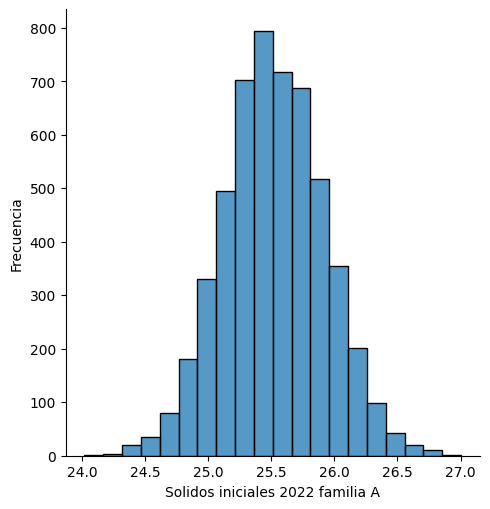

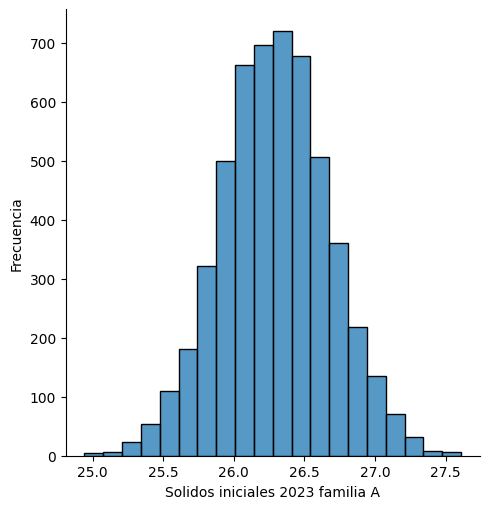

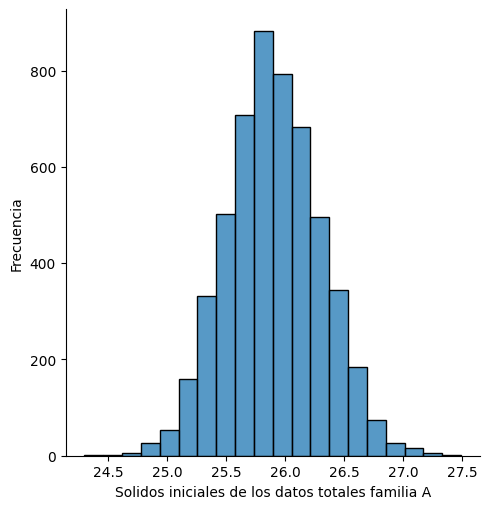

In [ ]:
h_SIA22 = sns.displot(means_SIA22, kde = False, bins = 20)
h_SIA22.set_axis_labels("Solidos iniciales 2022 familia A", "Frecuencia")

h_SIA23 = sns.displot(means_SIA23, kde = False, bins = 20)
h_SIA23.set_axis_labels("Solidos iniciales 2023 familia A", "Frecuencia")

h_SIA = sns.displot(means_SIA, kde = False, bins = 20)
h_SIA.set_axis_labels("Solidos iniciales de los datos totales familia A", "Frecuencia")

*  Solidos finales

In [ ]:
#PARA EL AÑO 2022
means_SFA22 = bootst(df_A22['SOLIDOS FINAL'])

Curtosis: 0.08449284041267102
Asimetria: 0.04819044339104774
Error estándar: 0.3959354260352158
Valor mínimo: 23.430130000000002
Valor máximo: 26.578169999999997
Rango: 3.1480399999999946
Intervalo de 95% confianza de la media: 24.40017375 < 25.163212438609747 < 25.9480115


In [ ]:
#PARA EL AÑO 2023
means_SFA23 = bootst(df_A23['SOLIDOS FINAL'])

Curtosis: 0.002413265161625322
Asimetria: 0.09064032574917796
Error estándar: 0.37065038875729406
Valor mínimo: 24.36652
Valor máximo: 27.11772
Rango: 2.751199999999997
Intervalo de 95% confianza de la media: 24.9626155 < 25.66895719493766 < 26.41516125


In [ ]:
#PARA EL CONJUNTO TOTAL DE DATOS
means_SFA = bootst(df_A['SOLIDOS FINAL'])

Curtosis: -0.11642479121980509
Asimetria: 0.05204209321526716
Error estándar: 0.38137176082732577
Valor mínimo: 24.07624
Valor máximo: 26.8177
Rango: 2.74146
Intervalo de 95% confianza de la media: 24.6914875 < 25.42323733282962 < 26.18276575


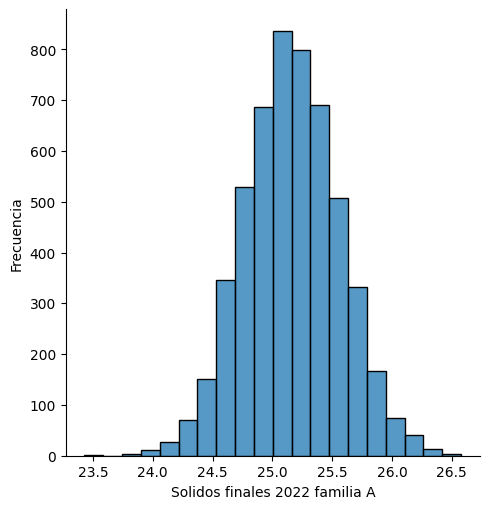

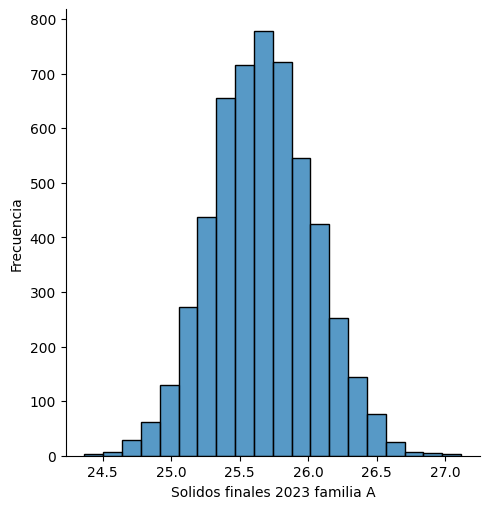

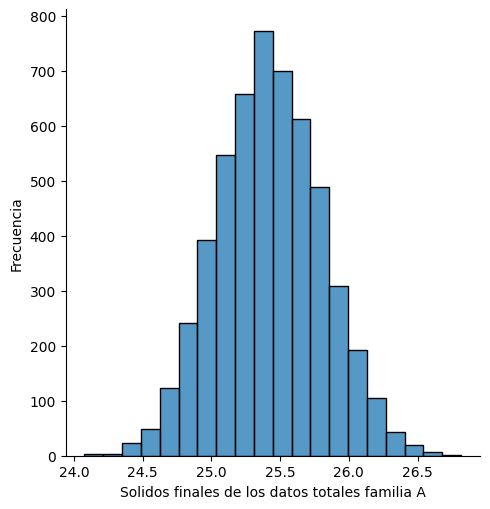

In [ ]:
h_SFA22 = sns.displot(means_SFA22, kde = False, bins = 20)
h_SFA22.set_axis_labels("Solidos finales 2022 familia A", "Frecuencia")

h_SFA23 = sns.displot(means_SFA23, kde = False, bins = 20)
h_SFA23.set_axis_labels("Solidos finales 2023 familia A", "Frecuencia")

h_SFA = sns.displot(means_SFA, kde = False, bins = 20)
h_SFA.set_axis_labels("Solidos finales de los datos totales familia A", "Frecuencia")

*Para la familia B*

  Con la finalidad de visualizar los graficos por año y finalmente uno por el conjunto total de datos se crean data frames para cada año de cada familia.

In [ ]:
df_B22 = df_B[df_B['ANO_ELAB']==2022]
df_B23 = df_B[df_B['ANO_ELAB']==2023]

*  Solidos iniciales

In [ ]:
#PARA EL AÑO 2022
means_SIB22 = bootst(df_B22['SOLIDOS INICIAL'])

Curtosis: 0.049212706341711154
Asimetria: 0.009245212636671189
Error estándar: 0.6717406318192851
Valor mínimo: 33.01238000000001
Valor máximo: 37.98589
Rango: 4.97350999999999
Intervalo de 95% confianza de la media: 34.07776825 < 35.405903554967885 < 36.7616005


In [ ]:
#PARA EL AÑO 2023
means_SIB23 = bootst(df_B23['SOLIDOS INICIAL'])

Curtosis: 0.13144330918726865
Asimetria: 0.05875301817456857
Error estándar: 0.687476542900194
Valor mínimo: 23.232290000000003
Valor máximo: 28.28634
Rango: 5.054049999999997
Intervalo de 95% confianza de la media: 24.27792375 < 25.634329333207404 < 26.971729500000002


In [ ]:
#PARA EL CONJUNTO DE TODOS LOS DATOS
means_SIB = bootst(df_B['SOLIDOS INICIAL'])

Curtosis: -0.06697937928250708
Asimetria: -0.015771029082074586
Error estándar: 0.6754987941924395
Valor mínimo: 29.8104
Valor máximo: 34.5425
Rango: 4.7320999999999955
Intervalo de 95% confianza de la media: 30.884159750000002 < 32.198049168870426 < 33.508165999999996


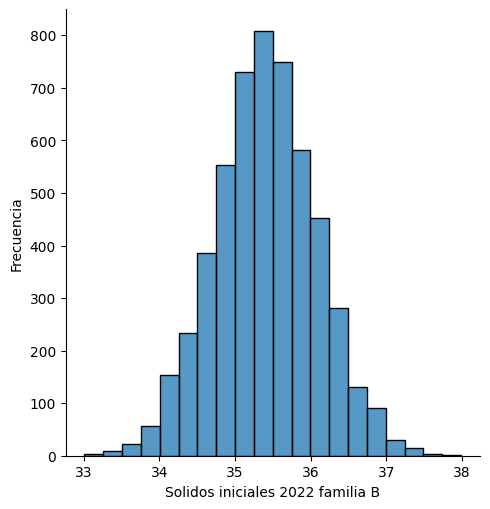

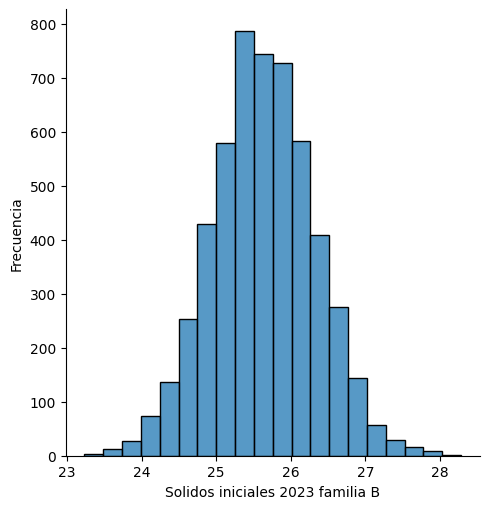

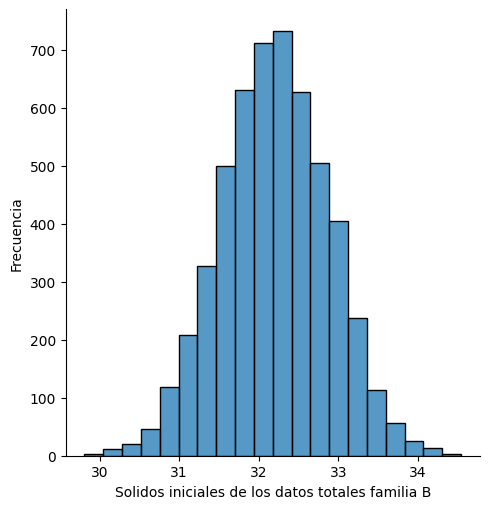

In [ ]:
h_SIB22 = sns.displot(means_SIB22, kde = False, bins = 20)
h_SIB22.set_axis_labels("Solidos iniciales 2022 familia B", "Frecuencia")

h_SIB23 = sns.displot(means_SIB23, kde = False, bins = 20)
h_SIB23.set_axis_labels("Solidos iniciales 2023 familia B", "Frecuencia")

h_SIB = sns.displot(means_SIB, kde = False, bins = 20)
h_SIB.set_axis_labels("Solidos iniciales de los datos totales familia B", "Frecuencia")

*  Solidos finales

In [ ]:
#PARA EL AÑO 2022
means_SFB22 = bootst(df_B22['SOLIDOS FINAL'])

Curtosis: -0.00897506230000511
Asimetria: -0.010910044601544808
Error estándar: 0.6577566573141793
Valor mínimo: 32.39725
Valor máximo: 37.35508
Rango: 4.957830000000001
Intervalo de 95% confianza de la media: 33.86560025 < 35.135948855307895 < 36.403388500000005


In [ ]:
#PARA EL AÑO 2023
means_SFB23 = bootst(df_B23['SOLIDOS FINAL'])

Curtosis: 0.03775842580993283
Asimetria: 0.04593685470793214
Error estándar: 0.6700870426349218
Valor mínimo: 22.958269999999995
Valor máximo: 27.722099999999998
Rango: 4.763830000000002
Intervalo de 95% confianza de la media: 23.8659635 < 25.17902721004911 < 26.498952499999998


In [ ]:
#PARA EL CONJUNTO DE TODOS LOS DATOS
means_SFB = bootst(df_B['SOLIDOS FINAL'])

Curtosis: 0.029355938565585937
Asimetria: -0.0338010898627633
Error estándar: 0.6879608319657526
Valor mínimo: 29.423659999999998
Valor máximo: 34.27225
Rango: 4.8485900000000015
Intervalo de 95% confianza de la media: 30.531812 < 31.856178683415184 < 33.217732000000005


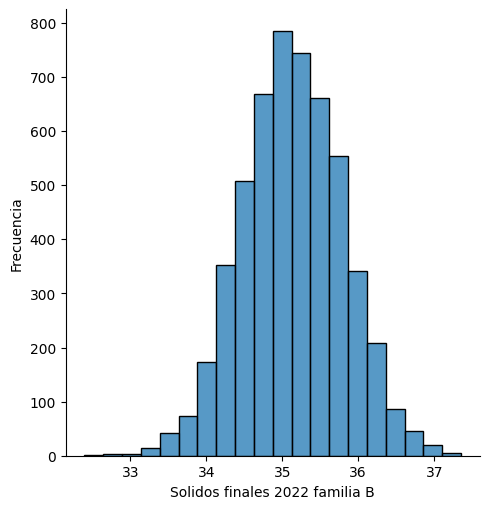

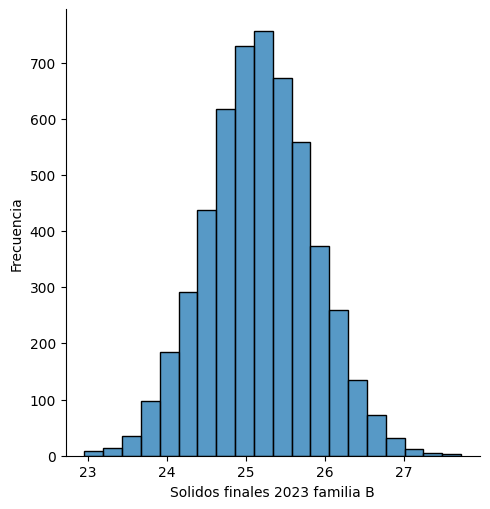

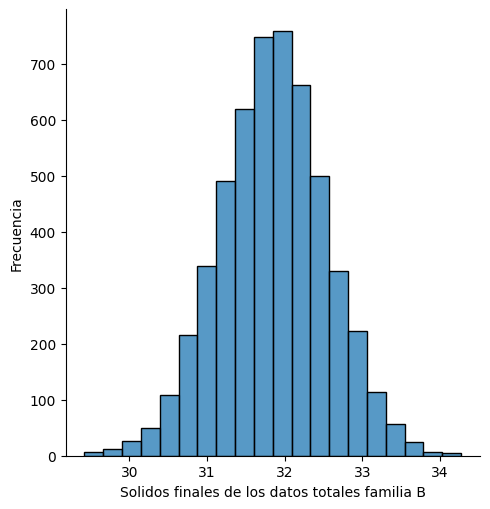

In [ ]:
h_SFB22 = sns.displot(means_SFB22, kde = False, bins = 20)
h_SFB22.set_axis_labels("Solidos finales 2022 familia B", "Frecuencia")

h_SFB23 = sns.displot(means_SFB23, kde = False, bins = 20)
h_SFB23.set_axis_labels("Solidos finales 2023 familia B", "Frecuencia")

h_SFB = sns.displot(means_SFB, kde = False, bins = 20)
h_SFB.set_axis_labels("Solidos finales de los datos totales familia B", "Frecuencia")

*Para la familia C*

  Con la finalidad de visualizar los graficos por año y finalmente uno por el conjunto total de datos se crean data frames para cada año de cada familia.

In [ ]:
df_C22 = df_C[df_C['ANO_ELAB']==2022]
df_C23 = df_C[df_C['ANO_ELAB']==2023]

*  Solidos iniciales

In [ ]:
#PARA EL AÑO 2022
means_SIC22 = bootst(df_C22['SOLIDOS INICIAL'])

Curtosis: 0.02518163422565145
Asimetria: 0.024650664095389945
Error estándar: 0.33769033869912873
Valor mínimo: 36.97099
Valor máximo: 39.72677
Rango: 2.7557800000000015
Intervalo de 95% confianza de la media: 37.50137525 < 38.173436592368716 < 38.8319645


In [ ]:
#PARA EL AÑO 2023
means_SIC23 = bootst(df_C23['SOLIDOS INICIAL'])

Curtosis: 0.029129146635003433
Asimetria: -0.010806034783484915
Error estándar: 0.2949256049830923
Valor mínimo: 42.38655
Valor máximo: 44.5116
Rango: 2.1250500000000017
Intervalo de 95% confianza de la media: 42.918335500000005 < 43.497823417075935 < 44.07519025


In [ ]:
#PARA EL CONJUNTO DE TODOS LOS DATOS
means_SIC = bootst(df_C['SOLIDOS INICIAL'])

Curtosis: -0.01889856414269797
Asimetria: 0.015132526285383878
Error estándar: 0.33058214085237303
Valor mínimo: 39.63142
Valor máximo: 41.94964
Rango: 2.3182200000000037
Intervalo de 95% confianza de la media: 40.087955 < 40.73619311295807 < 41.3833695


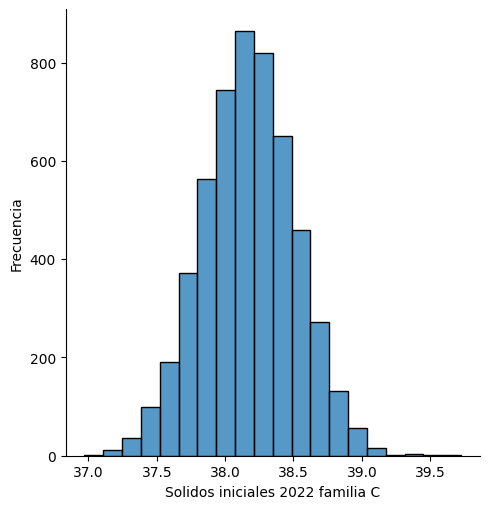

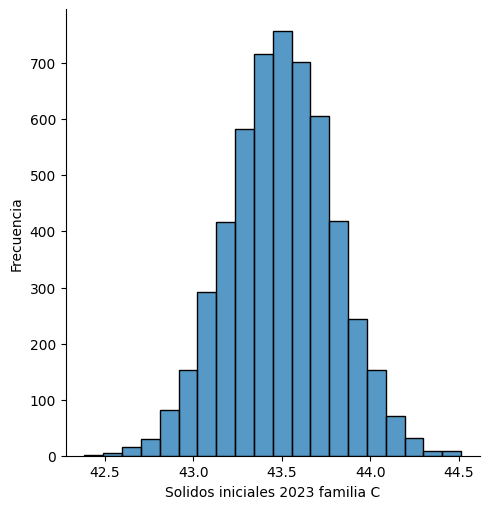

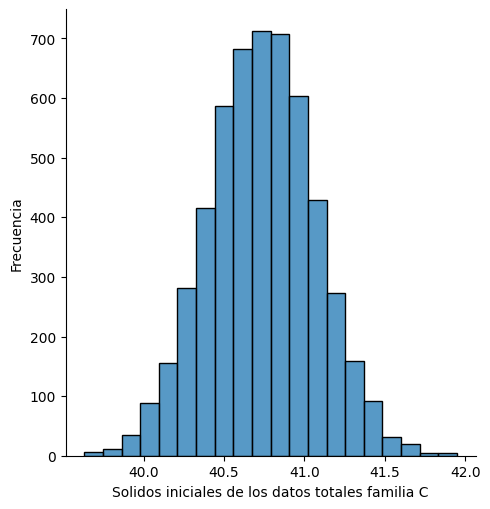

In [ ]:
h_SIC22 = sns.displot(means_SIC22, kde = False, bins = 20)
h_SIC22.set_axis_labels("Solidos iniciales 2022 familia C", "Frecuencia")

h_SIC23 = sns.displot(means_SIC23, kde = False, bins = 20)
h_SIC23.set_axis_labels("Solidos iniciales 2023 familia C", "Frecuencia")

h_SIC = sns.displot(means_SIC, kde = False, bins = 20)
h_SIC.set_axis_labels("Solidos iniciales de los datos totales familia C", "Frecuencia")

*  Solidos finales

In [ ]:
#PARA EL AÑO 2022
means_SFC22 = bootst(df_C22['SOLIDOS FINAL'])

Curtosis: -0.056252034840941434
Asimetria: -0.012229065443006653
Error estándar: 0.32908140488037296
Valor mínimo: 36.04368
Valor máximo: 38.46804
Rango: 2.42436
Intervalo de 95% confianza de la media: 36.612397 < 37.25465025878353 < 37.888870250000004


In [ ]:
#PARA EL AÑO 2023
means_SFC23 = bootst(df_C23['SOLIDOS FINAL'])

Curtosis: -0.049923695498462095
Asimetria: -0.05818487214534578
Error estándar: 0.294221185207587
Valor mínimo: 41.33826
Valor máximo: 43.347240000000006
Rango: 2.008980000000008
Intervalo de 95% confianza de la media: 41.79353625 < 42.38572311295807 < 42.947540749999995


In [ ]:
#PARA EL CONJUNTO DE TODOS LOS DATOS
means_SFC = bootst(df_C['SOLIDOS FINAL'])

Curtosis: 0.04266455734872521
Asimetria: 0.0298773614454439
Error estándar: 0.32622807177951463
Valor mínimo: 38.534240000000004
Valor máximo: 40.94493
Rango: 2.4106899999999953
Intervalo de 95% confianza de la media: 39.09282650000001 < 39.73585159236872 < 40.388475250000006


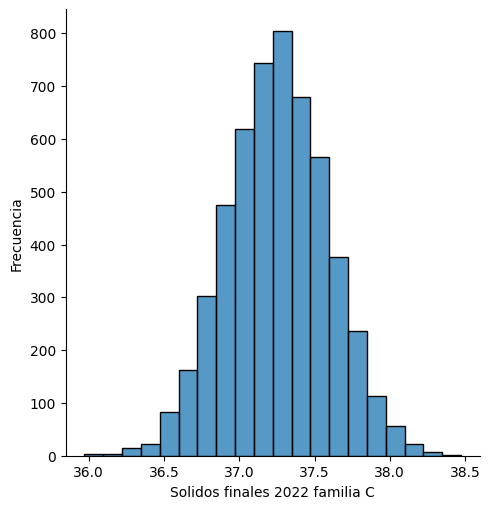

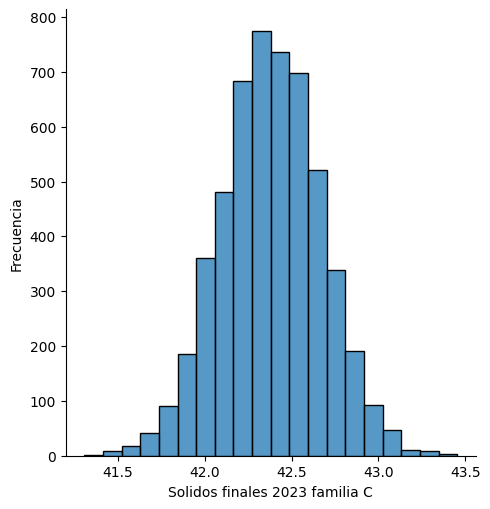

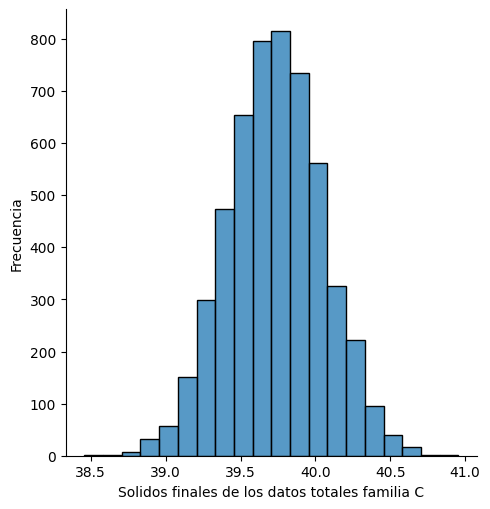

In [ ]:
h_SFC22 = sns.displot(means_SFC22, kde = False, bins = 20)
h_SFC22.set_axis_labels("Solidos finales 2022 familia C", "Frecuencia")

h_SFC23 = sns.displot(means_SFC23, kde = False, bins = 20)
h_SFC23.set_axis_labels("Solidos finales 2023 familia C", "Frecuencia")

h_SFC = sns.displot(means_SFC, kde = False, bins = 20)
h_SFC.set_axis_labels("Solidos finales de los datos totales familia C", "Frecuencia")

*Para la familia D*

  Con la finalidad de visualizar los graficos por año y finalmente uno por el conjunto total de datos se crean data frames para cada año de cada familia.

In [ ]:
df_D22 = df_D[df_D['ANO_ELAB']==2022]
df_D23 = df_D[df_D['ANO_ELAB']==2023]

*  Solidos iniciales

In [ ]:
#PARA EL AÑO 2022
means_SID22 = bootst(df_D22['SOLIDOS INICIAL'])

Curtosis: 0.09828024925596912
Asimetria: -0.13478732759450046
Error estándar: 0.14915827678726348
Valor mínimo: 48.504940000000005
Valor máximo: 49.780080000000005
Rango: 1.2751400000000004
Intervalo de 95% confianza de la media: 48.82232925 < 49.126449703437856 < 49.406882249999995


In [ ]:
#PARA EL AÑO 2023
means_SID23 = bootst(df_D23['SOLIDOS INICIAL'])

Curtosis: 0.03755769697226352
Asimetria: -0.021017041850433654
Error estándar: 0.1404552585210835
Valor mínimo: 47.67481
Valor máximo: 48.832339999999995
Rango: 1.1575299999999942
Intervalo de 95% confianza de la media: 47.97259875 < 48.24796725349452 < 48.5268105


In [ ]:
#PARA EL CONJUNTO DE TODOS LOS DATOS
means_SID = bootst(df_D['SOLIDOS INICIAL'])

Curtosis: 0.018421441101167613
Asimetria: -0.1619793160929717
Error estándar: 0.14704326394227119
Valor mínimo: 48.01872
Valor máximo: 49.17266
Rango: 1.1539399999999986
Intervalo de 95% confianza de la media: 48.377525750000004 < 48.67159357007933 < 48.944287


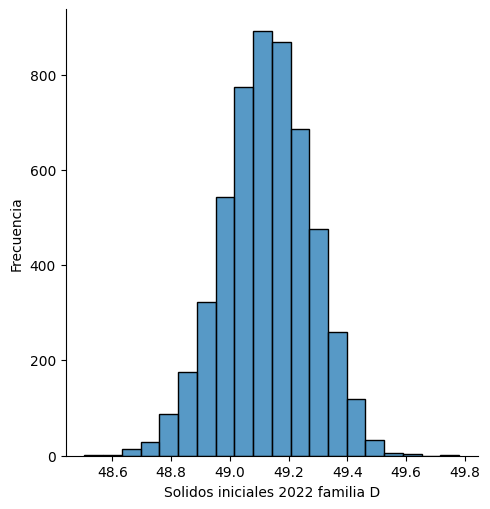

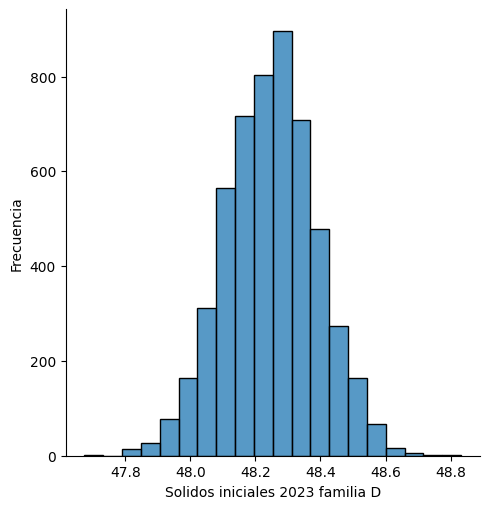

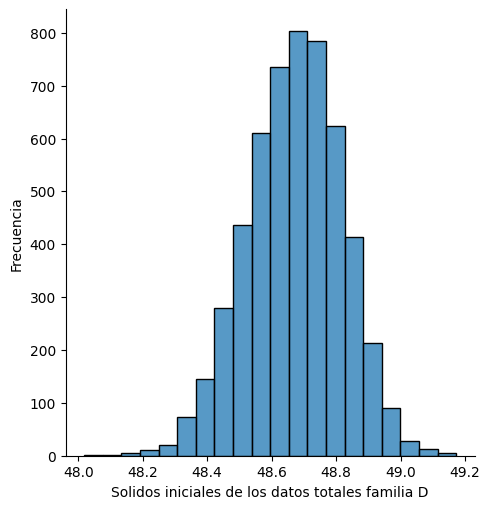

In [ ]:
h_SID22 = sns.displot(means_SID22, kde = False, bins = 20)
h_SID22.set_axis_labels("Solidos iniciales 2022 familia D", "Frecuencia")

h_SID23 = sns.displot(means_SID23, kde = False, bins = 20)
h_SID23.set_axis_labels("Solidos iniciales 2023 familia D", "Frecuencia")

h_SID = sns.displot(means_SID, kde = False, bins = 20)
h_SID.set_axis_labels("Solidos iniciales de los datos totales familia D", "Frecuencia")

*  Solidos finales

In [ ]:
#PARA EL AÑO 2022
means_SFD22 = bootst(df_D22['SOLIDOS FINAL'])

Curtosis: -0.0002979499674453656
Asimetria: -0.024305323299239158
Error estándar: 0.12433739311517264
Valor mínimo: 47.95143
Valor máximo: 48.8212
Rango: 0.8697699999999955
Intervalo de 95% confianza de la media: 48.13347 < 48.3770015054779 < 48.6152205


In [ ]:
#PARA EL AÑO 2023
means_SFD23 = bootst(df_D23['SOLIDOS FINAL'])

Curtosis: 0.01458737939838839
Asimetria: -0.007485880609100044
Error estándar: 0.13119151018665315
Valor mínimo: 46.969699999999996
Valor máximo: 47.86361
Rango: 0.8939100000000053
Intervalo de 95% confianza de la media: 47.158585 < 47.41706307706838 < 47.676356750000004


In [ ]:
#PARA EL CONJUNTO DE TODOS LOS DATOS
means_SFD = bootst(df_D['SOLIDOS FINAL'])

Curtosis: -0.02962582841182204
Asimetria: -0.036929122349145894
Error estándar: 0.1282805547862058
Valor mínimo: 47.41211
Valor máximo: 48.341370000000005
Rango: 0.9292600000000064
Intervalo de 95% confianza de la media: 47.62729475 < 47.878324835663015 < 48.125732


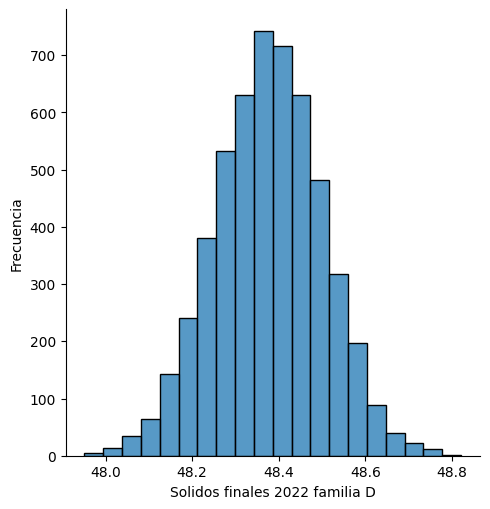

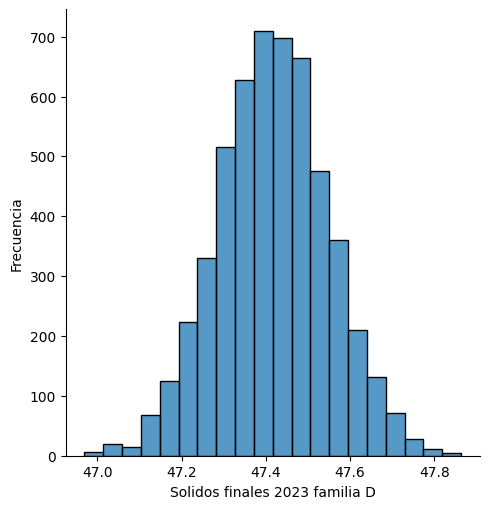

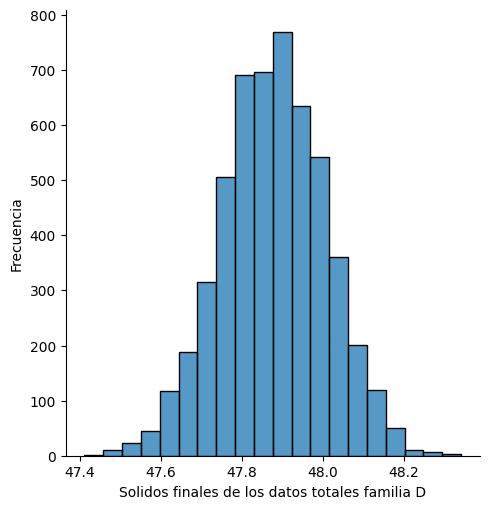

In [ ]:
h_SFD22 = sns.displot(means_SFD22, kde = False, bins = 20)
h_SFD22.set_axis_labels("Solidos finales 2022 familia D", "Frecuencia")

h_SFD23 = sns.displot(means_SFD23, kde = False, bins = 20)
h_SFD23.set_axis_labels("Solidos finales 2023 familia D", "Frecuencia")

h_SFD = sns.displot(means_SFD, kde = False, bins = 20)
h_SFD.set_axis_labels("Solidos finales de los datos totales familia D", "Frecuencia")

*Para la familia E*

  Con la finalidad de visualizar los graficos por año y finalmente uno por el conjunto total de datos se crean data frames para cada año de cada familia.

In [ ]:
df_E22 = df_E[df_E['ANO_ELAB']==2022]
df_E23 = df_E[df_E['ANO_ELAB']==2023]

*  Solidos iniciales

In [ ]:
#PARA EL AÑO 2022
means_SIE22 = bootst(df_E22['SOLIDOS INICIAL'])

Curtosis: 0.05672182731871667
Asimetria: 0.017489502255279975
Error estándar: 0.40444021673708125
Valor mínimo: 35.349849999999996
Valor máximo: 38.22303
Rango: 2.873180000000005
Intervalo de 95% confianza de la media: 35.95699975 < 36.74516879297318 < 37.53113775


In [ ]:
#PARA EL AÑO 2023
means_SIE23 = bootst(df_E23['SOLIDOS INICIAL'])

Curtosis: 0.14753635373618135
Asimetria: 0.030345824444420025
Error estándar: 0.4409181432481329
Valor mínimo: 35.137910000000005
Valor máximo: 38.571419999999996
Rango: 3.433509999999991
Intervalo de 95% confianza de la media: 35.89719025 < 36.76831237249717 < 37.62678149999999


In [ ]:
#PARA EL CONJUNTO TOTAL DE DATOS
means_SIE = bootst(df_E['SOLIDOS INICIAL'])

Curtosis: 0.0666234346251291
Asimetria: 0.003209593524564202
Error estándar: 0.4279792380855711
Valor mínimo: 35.16036
Valor máximo: 38.32890999999999
Rango: 3.168549999999996
Intervalo de 95% confianza de la media: 35.90336475 < 36.75770382130714 < 37.5896915


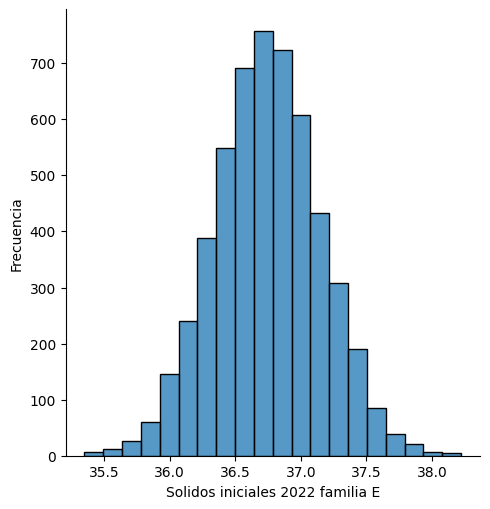

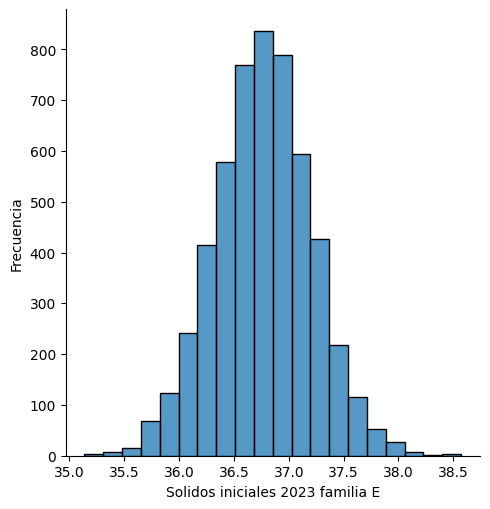

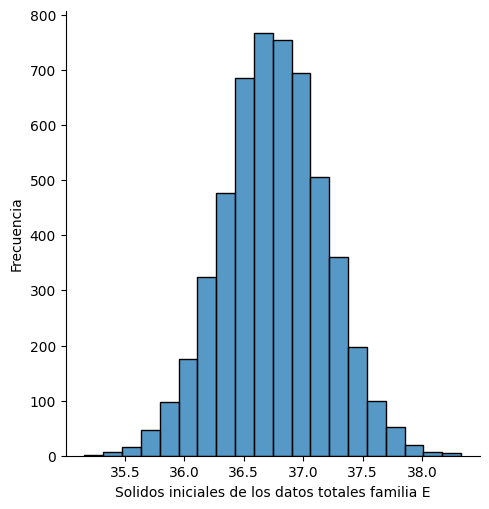

In [ ]:
h_SIE22 = sns.displot(means_SIE22, kde = False, bins = 20)
h_SIE22.set_axis_labels("Solidos iniciales 2022 familia E", "Frecuencia")

h_SIE23 = sns.displot(means_SIE23, kde = False, bins = 20)
h_SIE23.set_axis_labels("Solidos iniciales 2023 familia E", "Frecuencia")

h_SIE = sns.displot(means_SIE, kde = False, bins = 20)
h_SIE.set_axis_labels("Solidos iniciales de los datos totales familia E", "Frecuencia")

*  Solidos finales

In [ ]:
#PARA EL AÑO 2022
means_SFE22 = bootst(df_E22['SOLIDOS FINAL'])

Curtosis: 0.06480556541163374
Asimetria: 0.008137680777320374
Error estándar: 0.3997084121572291
Valor mínimo: 34.726440000000004
Valor máximo: 37.72806
Rango: 3.0016199999999955
Intervalo de 95% confianza de la media: 35.50258625 < 36.270855323007176 < 37.058476500000005


In [ ]:
#PARA EL AÑO 2023
means_SFE23 = bootst(df_E23['SOLIDOS FINAL'])

Curtosis: -0.009609740520776011
Asimetria: 0.05169949811633808
Error estándar: 0.4387087123349023
Valor mínimo: 34.7933
Valor máximo: 37.95087
Rango: 3.1575699999999998
Intervalo de 95% confianza de la media: 35.495828749999994 < 36.33080695315451 < 37.198959249999994


In [ ]:
#PARA EL CONJUNTO DE TODOS LOS DATOS
means_SFE = bootst(df_E['SOLIDOS FINAL'])

Curtosis: -0.005481099840871195
Asimetria: -0.015299198860558963
Error estándar: 0.4149698223078078
Valor mínimo: 34.582809999999995
Valor máximo: 37.873050000000006
Rango: 3.2902400000000114
Intervalo de 95% confianza de la media: 35.499543 < 36.30744748961088 < 37.11185475


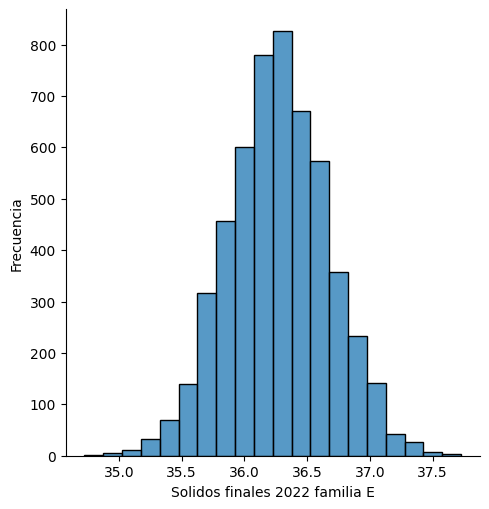

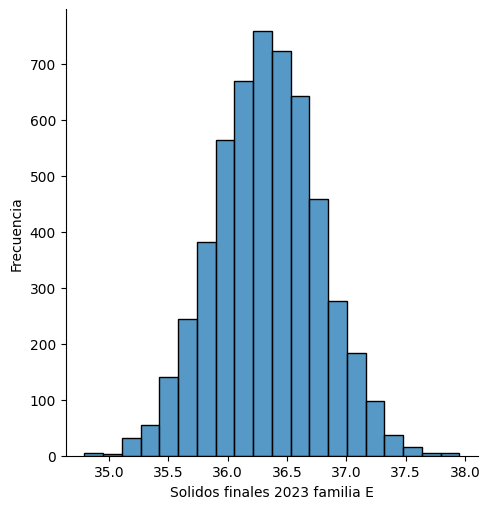

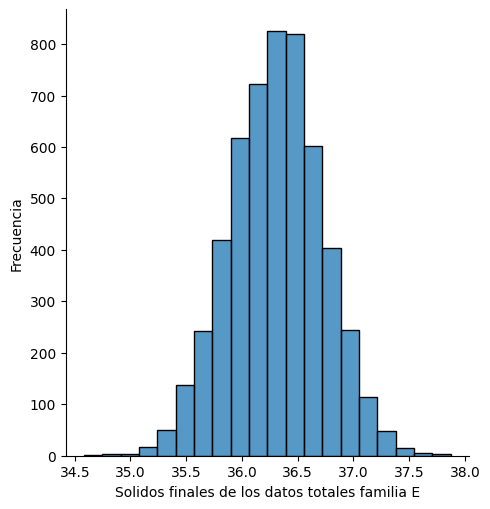

In [ ]:
h_SFE22 = sns.displot(means_SFE22, kde = False, bins = 20)
h_SFE22.set_axis_labels("Solidos finales 2022 familia E", "Frecuencia")

h_SFE23 = sns.displot(means_SFE23, kde = False, bins = 20)
h_SFE23.set_axis_labels("Solidos finales 2023 familia E", "Frecuencia")

h_SFE = sns.displot(means_SFE, kde = False, bins = 20)
h_SFE.set_axis_labels("Solidos finales de los datos totales familia E", "Frecuencia")

### **Conclusiones sobre analisis de datos**

Una vez concluida una revision rapida de un analisis de datos desde el punto de vista de la estadistica tenemos a la mano informacion acerca del comportamiento de la variable de solidos, dicha informacion es en base a los datos contenidos en la base de datos por lo que nos permite conocer el comportamiento de los datos por familia.

Un análisis de datos nos da una vista general del tipo de datos que estamos trabajando asi como visualizar focos en la base de datos que se puedan trabajar con machine learning, como en nuestro caso que se buscara responder a las dos preguntas planteadas con anterior, de esta forma no solo proveeremos informacion del comportamiento de los datos actuales si no ademas predicciones del comportamiento de datos futuros.

#Separación, validación y evaluación para algoritmos de Machine Learning

### Preparación y visualización de datos para el proceso.

In [ ]:
print(df.shape[0], "," , df.shape[1])

5294 , 20


In [ ]:
X= df.iloc[:,0:19]
y= df.iloc[:,1]

In [ ]:
X.shape

(5294, 19)

In [ ]:
y.shape

(5294,)

### Funciones de separación de entrenamiento, validación y prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train.shape

(4235, 19)

In [ ]:
X_test.shape

(1059, 19)

  ### Función para realizar K-Fold Cross Validation o Leave-One-Out Cross Validation.


In [ ]:
def kfold_cross_validation(df, k=5):
    X = df.drop('FAMILIA', axis=1)
    y = df['FAMILIA']

    if k == 1:
        kfold = KFold(n_splits=len(df))
    else:
        kfold = KFold(n_splits=k)
    return kfold.split(X, y)

In [ ]:
splits = kfold_cross_validation(df, k=5)

for fold, (train_idx, test_idx) in enumerate(splits):
    print(f"Fold {fold + 1}:")
    print(f"  - Conjunto de entrenamiento: {train_idx}")
    print(f"  - Conjunto de prueba: {test_idx}")

Fold 1:
  - Conjunto de entrenamiento: [1059 1060 1061 ... 5291 5292 5293]
  - Conjunto de prueba: [   0    1    2 ... 1056 1057 1058]
Fold 2:
  - Conjunto de entrenamiento: [   0    1    2 ... 5291 5292 5293]
  - Conjunto de prueba: [1059 1060 1061 ... 2115 2116 2117]
Fold 3:
  - Conjunto de entrenamiento: [   0    1    2 ... 5291 5292 5293]
  - Conjunto de prueba: [2118 2119 2120 ... 3174 3175 3176]
Fold 4:
  - Conjunto de entrenamiento: [   0    1    2 ... 5291 5292 5293]
  - Conjunto de prueba: [3177 3178 3179 ... 4233 4234 4235]
Fold 5:
  - Conjunto de entrenamiento: [   0    1    2 ... 4233 4234 4235]
  - Conjunto de prueba: [4236 4237 4238 ... 5291 5292 5293]


### Función para evaluar el rendimiento mediante la matriz de confusión.

In [ ]:
if df.isnull().values.any():
    df = df.dropna()

In [ ]:
X = df.drop('FAMILIA', axis=1)
X = pd.get_dummies(X)
y = df['FAMILIA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

y_true = y_test.values
y_pred = modelo.predict(X_test)

conf_matrix = confusion_matrix(y_true, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[103   0   0   0   0]
 [  0 190   2   1   0]
 [  0   0 269   1   0]
 [  0   0   3 297   0]
 [  0   0   3   1 182]]


 ### Función para calcular precisión (accuracy), sensibilidad y especificidad.

In [ ]:
y_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' para problemas multiclase
print(f"Precisión: {precision}")

sensibilidad = recall_score(y_test, y_pred, average='weighted')  # 'weighted' para problemas multiclase
print(f"Sensibilidad: {sensibilidad}")

conf_matrix = [[103, 0, 0, 0, 0],
               [0, 188, 2, 3, 0],
               [0, 0, 270, 0, 0],
               [0, 0, 3, 297, 0],
               [0, 0, 5, 1, 180]]

tn, fp, fn, tp = conf_matrix[0][0], sum(conf_matrix[0][1:]), sum(conf_matrix[1:][0]), sum(sum(row[1:]) for row in conf_matrix[1:])
especificidad = tn / (tn + fp)

print(f"Especificidad: {especificidad}")

Accuracy: 0.9895437262357415
Precisión: 0.9897358993013138
Sensibilidad: 0.9895437262357415
Especificidad: 1.0


### Función para evaluar el rendimiento en un problema multiclase.

In [ ]:
y_pred = modelo.predict(X_test)

# Métricas generales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
sensibilidad = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Imprimir métricas
print("Métricas generales:")
print(f"  Accuracy: {accuracy}")
print(f"  Precisión: {precision}")
print(f"  Sensibilidad: {sensibilidad}")
print(f"  F1-score: {f1}")

print("\nMatriz de Confusión:")
print(conf_matrix)

print("\nReporte de Clasificación:")
print(class_report)

Métricas generales:
  Accuracy: 0.9895437262357415
  Precisión: 0.9897358993013138
  Sensibilidad: 0.9895437262357415
  F1-score: 0.9895666334216741

Matriz de Confusión:
[[103   0   0   0   0]
 [  0 190   2   1   0]
 [  0   0 269   1   0]
 [  0   0   3 297   0]
 [  0   0   3   1 182]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       103
           B       1.00      0.98      0.99       193
           C       0.97      1.00      0.98       270
           D       0.99      0.99      0.99       300
           E       1.00      0.98      0.99       186

    accuracy                           0.99      1052
   macro avg       0.99      0.99      0.99      1052
weighted avg       0.99      0.99      0.99      1052



# Algoritmos no supervisados (K-Means) y algoritmos supervisados (Regresión lineal y Árboles de decisión)

####Primero, vamos a identificar las columnas no numéricas:

Antes de escalar los datos, verificamos qué columnas de nuestro conjunto de datos contienen valores no numéricos.

In [ ]:
# Identificar columnas no numéricas y numéricas
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Columnas no numéricas:", non_numeric_columns)

Columnas no numéricas: Index(['LOTE', 'FAMILIA', 'PRODUCTO', 'CONDICIÓN', 'ORIGEN', 'ENVASE',
       'REACTOR', 'FECHA_FAB', 'STATUS', 'FABRICACIÓN', 'ANALISTA INICIAL',
       'ANALISTA FINAL'],
      dtype='object')


Y después verificamos cuales eran las columnas numéricas dentro de nuestro conjunto de datos.

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Columnas numéricas:", numeric_columns)

Columnas numéricas: Index(['SÓLIDOS FINAL', 'VISCOSIDAD FINAL', 'PH FINAL', 'GRUMO FINAL',
       'SOLIDOS INICIAL', 'VISCOSIDAD INICIAL', 'PH INICIAL', 'GRUMO INICIAL'],
      dtype='object')


Este código utiliza la función select_dtypes de pandas para seleccionar las columnas basadas en su tipo de datos.

Con include=['number'], estás seleccionando todas las columnas que son de tipo numérico.

Así, numeric_columns contendrá los nombres de las columnas numéricas y así utilizar este resultado para realizar operaciones específicas en las columnas numéricas de nuestros datos.






In [ ]:
# Reemplazamos los NaN con 0 solo en las columnas numéricas
df_clean = df.copy()  # Agregamos este codigo, para no modificar el DataFrame original
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(0)

# Filtramos las filas donde todas las columnas numéricas son mayores a 0
df_clean = df_clean[(df_clean[numeric_columns] > 0).all(axis=1)]

#Por ultimo, imprimimos el DataFrame resultante, el cual usaremos en los siguientes procesos.
print(df_clean)

           LOTE FAMILIA PRODUCTO CONDICIÓN ORIGEN ENVASE REACTOR   FECHA_FAB  \
603   22J200193       B    B-011         A      P    TBR     R15  20/10/2022   
604   22J250680       B    B-011         A      P    PIP     PIP  25/10/2022   
605   22K010052       B    B-011         A      P    TBR     R15  31/10/2022   
606   22K010053       B    B-011         A      P    TBR     R15  01/11/2022   
607   22K240254       B    B-011         A      P    TBR     R15  25/11/2022   
...         ...     ...      ...       ...    ...    ...     ...         ...   
5289  23J050046       E    E-026         A      P    TBR     R08  05/10/2023   
5290  23K010609       E    E-026         A      P    PIP     PIP  31/10/2023   
5291  23K030051       E    E-026         A      P    CON     R08  06/11/2023   
5292  23K100126       E    E-026         A      P    TBR     R08  13/11/2023   
5293  23K130139       E    E-026         A      P    TBR     R08  14/11/2023   

     STATUS FABRICACIÓN  SÓLIDOS FINAL 

###**Algoritmos no supervisados**

Vamos a realizar una clasificación de las muestras basada en algunos de los atributos presentes en nuestro conjunto de datos, en este caso para clasificar las muestras en grupos basados en las columnas "SOLIDOS INICIAL" y "SÓLIDOS FINAL", basandonos en los diferentes tipos de "FAMILIA" que podemos encontrar en el dataframe.

In [ ]:
#seleccionamos las columnas relevantes para el análisis.
datos_analisis = df[['FAMILIA', 'SOLIDOS INICIAL', 'SÓLIDOS FINAL']]


###**Distancia Euclidiana**

In [ ]:
def distEuclidiana(dataset, col_inicial, col_final, num_muestras=3):
    muestra_solidos = dataset.sample(num_muestras)[[col_inicial, col_final]].to_numpy()
    distancias = np.zeros((num_muestras, 2))  #almacenamos 2 distancias por muestra

    for i in range(num_muestras):
        muestra = muestra_solidos[i, :]

        #Comparación de el primer valor de sólidos con el segundo valor seleccionado y viceversa
        distancias[i, 0] = np.linalg.norm(dataset[col_inicial].to_numpy() - muestra[0])
        distancias[i, 1] = np.linalg.norm(dataset[col_final].to_numpy() - muestra[1])

    return muestra_solidos, distancias

In [ ]:
#Utilizamos el DataFrame df_clean, para evitar usar datos nulos
col_inicial = 'SOLIDOS INICIAL'
col_final = 'SÓLIDOS FINAL'
col_familia = 'FAMILIA'

#Obtenemos todas las familias únicas
familias_unicas = df_clean[col_familia].unique()

#Calculamos las distancias euclidianas para las primeras 2 muestras de SOLIDOS INICIAL y SÓLIDOS FINAL
for familia in familias_unicas:

    #Filtramos el DataFrame por familia y tomar solo las primeras 2 muestras
    df_familia = df_clean[df_clean[col_familia] == familia].head(2)

    muestra_solidos, distancias_solidos = distEuclidiana(df_familia, col_inicial, col_final, num_muestras=2)

    # Visualización de resultados
    print(f"\nResultados para la Familia {familia}:")
    i = 0
    # Índice de la primera muestra
    print(f"\nMuestra {i + 1} de SOLIDOS INICIAL y SÓLIDOS FINAL:")
    print(f"SOLIDOS INICIAL {i + 1}: {muestra_solidos[i, 0]}")
    print(f"SOLIDOS INICIAL {i + 2}: {muestra_solidos[i + 1, 0]}")
    print(f"Distancia Euclidiana para SOLIDOS INICIAL {i + 1} y {i + 2}: {distancias_solidos[i, 0]}")

    print(f"SÓLIDOS FINAL {i + 1}: {muestra_solidos[i, 1]}")
    print(f"SÓLIDOS FINAL {i + 2}: {muestra_solidos[i + 1, 1]}")
    print(f"Distancia Euclidiana para SÓLIDOS FINAL {i + 1} y {i + 2}: {distancias_solidos[i, 1]}")


Resultados para la Familia B:

Muestra 1 de SOLIDOS INICIAL y SÓLIDOS FINAL:
SOLIDOS INICIAL 1: 46.39
SOLIDOS INICIAL 2: 55.78
Distancia Euclidiana para SOLIDOS INICIAL 1 y 2: 9.39
SÓLIDOS FINAL 1: 54.95
SÓLIDOS FINAL 2: 55.0
Distancia Euclidiana para SÓLIDOS FINAL 1 y 2: 0.04999999999999716

Resultados para la Familia C:

Muestra 1 de SOLIDOS INICIAL y SÓLIDOS FINAL:
SOLIDOS INICIAL 1: 47.22
SOLIDOS INICIAL 2: 46.33
Distancia Euclidiana para SOLIDOS INICIAL 1 y 2: 0.8900000000000006
SÓLIDOS FINAL 1: 45.36
SÓLIDOS FINAL 2: 45.36
Distancia Euclidiana para SÓLIDOS FINAL 1 y 2: 0.0

Resultados para la Familia D:

Muestra 1 de SOLIDOS INICIAL y SÓLIDOS FINAL:
SOLIDOS INICIAL 1: 56.04
SOLIDOS INICIAL 2: 55.18
Distancia Euclidiana para SOLIDOS INICIAL 1 y 2: 0.8599999999999994
SÓLIDOS FINAL 1: 52.98
SÓLIDOS FINAL 2: 53.05
Distancia Euclidiana para SÓLIDOS FINAL 1 y 2: 0.07000000000000028

Resultados para la Familia E:

Muestra 1 de SOLIDOS INICIAL y SÓLIDOS FINAL:
SOLIDOS INICIAL 1: 50.3
SO

Como hicimos las mismas comparaciones entre las familias dentro del dataframe, explicare un poco sobre el primer resultado. En este proceso para sacer la distancia euclidiana, tomamos dos muestras de solidos inicial y final dentro de la Familia B:

Muestra 1:
- Solidos inicial 1: 46.39
- Solidos final 1: 55.78

Muestra 2:
- Solidos inicial 1: 54.95
- Solidos final 1: 55.0

Distancias euclidianas:

Muestra 1: 9.39
Muestra 2: 0.04999999999999716

- La distancia entre los dos valores de solidos iniciales es de 9.39, la distancia es relativamente grande, indicando una diferencia significativa.

- Mientras que en solidos finales nos muestra un valor de 0.049..., indicando que la distancia es pequeña, con una similitud casi cercana a 0.

En resumen, las distancias euclidianas te dan una medida de la similitud o diferencia entre los pares de valores de SOLIDOS INICIAL y SÓLIDOS FINAL dentro de sus respectivas FAMILIAS.Una distancia de 0 indica alta similitud, mientras que distancias mayores indican mayores diferencias.

###**Centroide mas cercano y clasificación de centroides**

In [ ]:
def centroideCercano(muestra, dataset, col_inicial, col_final):
    listaDistancias = distEuclidiana(dataset, col_inicial, col_final)[1]
    centroideCercano = np.argmin(listaDistancias[:, 0] + listaDistancias[:, 1])
    return min(centroideCercano, len(dataset) - 1)  # Asegura que el índice esté dentro de los límites

In [ ]:
col_inicial = 'SOLIDOS INICIAL'
col_final = 'SÓLIDOS FINAL'

familias_unicas = df_clean['FAMILIA'].unique()

for familia in familias_unicas:
    # Filtramos el DataFrame por familia y tomar solo las primeras 2 muestras
    df_familia = df_clean[df_clean['FAMILIA'] == familia].head(2)

    #Calculamos el índice del centroide más cercano para la familia actual
    indice_centroide_cercano = centroideCercano(df_familia[[col_inicial, col_final]].to_numpy(), df_clean, col_inicial, col_final)

    print(f"\nResultados para la Familia {familia}:")
    print(f"Índice del centroide más cercano: {indice_centroide_cercano}")
    if indice_centroide_cercano < len(df_familia):
        print(f"Muestra de SOLIDOS INICIAL y SÓLIDOS FINAL:")
        print(df_familia[[col_inicial, col_final]].to_numpy()[indice_centroide_cercano, :])
    else:
        print("No hay muestras suficientes para calcular el centroide más cercano.")


Resultados para la Familia B:
Índice del centroide más cercano: 1
Muestra de SOLIDOS INICIAL y SÓLIDOS FINAL:
[46.39 54.95]

Resultados para la Familia C:
Índice del centroide más cercano: 1
Muestra de SOLIDOS INICIAL y SÓLIDOS FINAL:
[46.33 45.36]

Resultados para la Familia D:
Índice del centroide más cercano: 2
No hay muestras suficientes para calcular el centroide más cercano.

Resultados para la Familia E:
Índice del centroide más cercano: 0
Muestra de SOLIDOS INICIAL y SÓLIDOS FINAL:
[50.3 50.3]


Este codigo, selecciona aleatoriamente un numero de muestras del conjunto de datos, usando la funcion para distEuclidiana, para calcular las distancias euclidianas entre SOLIDOS dentro de cada FAMILIA, para posteriormente encontrar el indice del centroide mas cercano somando las distancias.

*Familia B*
  - SOLIDOS INICIAL y SÓLIDOS FINAL: [46.39 54.95]
  - Centroide mas cercano: 1

El índice del centroide más cercano se refiere al índice de la fila en el conjunto de datos dentro de "df_clean", que tiene la distancia euclidiana más baja con respecto a la muestra aleatoria.

En este caso, el índice 1 tiene la distancia euclidiana más baja, lo que significa que es el centroide más cercano a la muestra aleatoria seleccionada.

In [ ]:
def clasificarPorCentroides(muestras, centroides):
    # Utilizamos la distancia euclidiana que hicimos anteriormente, para clasificar por centroides
    distancias = np.linalg.norm(muestras[:, np.newaxis] - centroides, axis=2)
    asignaciones = np.argmin(distancias, axis=1)
    return asignaciones

'muestras' son las observaciones que se están clasificando, y centroides son los centroides de los clusters.

np.linalg.norm(muestras[:, np.newaxis] - centroides, axis=2) calcula la distancia euclidiana entre cada muestra y cada centroide.

np.argmin(distancias, axis=1) devuelve el índice del centroide más cercano para cada muestra, asignando la muestra al cluster correspondiente.

In [ ]:
col_inicial = 'SOLIDOS INICIAL'
col_final = 'SÓLIDOS FINAL'

familias_unicas = df_clean['FAMILIA'].unique()

#Inicio de listas para almacenar las asignaciones de centroides y las muestras
asignaciones_por_familia = []
muestras_por_familia = []

for familia in familias_unicas:

    df_familia = df_clean[df_clean['FAMILIA'] == familia].head(2)
    muestras = df_familia[[col_inicial, col_final]].to_numpy()
    indice_centroide_cercano = centroideCercano(muestras, df_clean, col_inicial, col_final)

    #Muestras y las asignaciones de centroides a las listas
    asignaciones_por_familia.append(clasificarPorCentroides(muestras, muestras))
    muestras_por_familia.append(muestras)


for i, familia in enumerate(familias_unicas):
    print(f"\nResultados para la Familia {familia}:")
    print(f"Asignaciones de Centroides:")
    print(asignaciones_por_familia[i])
    print(f"Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:")
    print(muestras_por_familia[i])


Resultados para la Familia B:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[55.78 55.  ]
 [46.39 54.95]]

Resultados para la Familia C:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[47.22 45.36]
 [46.33 45.36]]

Resultados para la Familia D:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[56.04 52.98]
 [55.18 53.05]]

Resultados para la Familia E:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[50.3 50.3]
 [50.  50. ]]


Esta función clasifica las muestras de  'SOLIDOS INICIAL' y 'SÓLIDOS FINAL' utilizando los centroides correspondientes y muestra los resultados.

Asignaciones de Centroides:
- [0 1]: Indica que las dos muestras de la Familia B se han asignado a dos grupos diferentes. La primera muestra se asignó al grupo 0 y la segunda muestra al grupo 1.

Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
- [[55.78 55. ] [46.39 54.95]]: Representa los valores de las dos muestras de la Familia B para las columnas "SOLIDOS INICIAL" y "SÓLIDOS FINAL".
La primera muestra tiene un valor de "SOLIDOS INICIAL" de 55.78 y un valor de "SÓLIDOS FINAL" de 55.0.
La segunda muestra tiene un valor de "SOLIDOS INICIAL" de 46.39 y un valor de "SÓLIDOS FINAL" de 54.95.

In [ ]:
def obtenerModa(resultados):
    # Calculo de moda usando scipy.stats.mode
    moda_result = mode(resultados, axis=None)

    # Si hay múltiples modas, se toma la primera
    moda = moda_result.mode[0] if isinstance(moda_result.mode, np.ndarray) else moda_result.mode

    return moda

In [ ]:
col_inicial = 'SOLIDOS INICIAL'
col_final = 'SÓLIDOS FINAL'
familias_unicas = df_clean['FAMILIA'].unique()

asignaciones_por_familia = []
muestras_por_familia = []


for familia in familias_unicas:
    df_familia = df_clean[df_clean['FAMILIA'] == familia].head(2)

    muestras = df_familia[[col_inicial, col_final]].to_numpy()
    indice_centroide_cercano = centroideCercano(muestras, df_clean, col_inicial, col_final)

    asignaciones_por_familia.append(clasificarPorCentroides(muestras, muestras))
    muestras_por_familia.append(muestras)


for i, familia in enumerate(familias_unicas):
    print(f"\nResultados para la Familia {familia}:")
    print(f"Asignaciones de Centroides:")
    print(asignaciones_por_familia[i])
    print(f"Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:")
    print(muestras_por_familia[i])

    #Moda de las asignaciones de centroides
    moda_asignaciones = obtenerModa(asignaciones_por_familia[i])
    print(f"Moda de las Asignaciones de Centroides: {moda_asignaciones}")


Resultados para la Familia B:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[55.78 55.  ]
 [46.39 54.95]]
Moda de las Asignaciones de Centroides: 0

Resultados para la Familia C:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[47.22 45.36]
 [46.33 45.36]]
Moda de las Asignaciones de Centroides: 0

Resultados para la Familia D:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[56.04 52.98]
 [55.18 53.05]]
Moda de las Asignaciones de Centroides: 0

Resultados para la Familia E:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[50.3 50.3]
 [50.  50. ]]
Moda de las Asignaciones de Centroides: 0


Después de obtener las asignaciones de centroides por familia, se calcula la moda de esas asignaciones utilizando la función obtenerModa. La moda se muestra como parte de los resultados por familia.

En este caso, la moda de las asignaciones de centroides para la familia B es 0.
- Esto significa que la asignación de la primera muestra ([55.78, 55.00]) es la más común entre las dos muestras.

###**Accuracy de una muestra con K-Media**

In [ ]:
def obtenerAccuracy_kmedias(muestras, centroides):
    numMuestras = muestras.shape[0]

    #Normalización de los datos para mejorar la convergencia del algoritmo k-means
    scaler = StandardScaler()
    muestras_normalizadas = scaler.fit_transform(muestras)

    resultados = clasificarPorCentroides(muestras_normalizadas, centroides)

    #moda de las asignaciones de cluster
    moda = obtenerModa(resultados)

    #Índices donde las asignaciones de cluster son diferentes de la moda y conteo de errores
    indicesErrores = np.where(resultados != moda)
    cantidadErrores = len(resultados[indicesErrores])

    #Precisión a porcentaje
    accuracy = ((numMuestras - cantidadErrores) / numMuestras) * 100

    return accuracy

In [ ]:
col_inicial = 'SOLIDOS INICIAL'
col_final = 'SÓLIDOS FINAL'

familias_unicas = df_clean['FAMILIA'].unique()
asignaciones_por_familia = []
muestras_por_familia = []


for familia in familias_unicas:
    df_familia = df_clean[df_clean['FAMILIA'] == familia].head(2)

    muestras = df_familia[[col_inicial, col_final]].to_numpy()
    indice_centroide_cercano = centroideCercano(muestras, df_clean, col_inicial, col_final)

    asignaciones_por_familia.append(clasificarPorCentroides(muestras, muestras))
    muestras_por_familia.append(muestras)


for i, familia in enumerate(familias_unicas):
    print(f"\nResultados para la Familia {familia}:")
    print(f"Asignaciones de Centroides:")
    print(asignaciones_por_familia[i])
    print(f"Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:")
    print(muestras_por_familia[i])

    # Calcular el accuracy de k-medias para las muestras de la familia actual
    accuracy_kmedias = obtenerAccuracy_kmedias(muestras_por_familia[i], muestras)
    print(f"Accuracy de k-medias: {accuracy_kmedias:.2f}%")


Resultados para la Familia B:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[55.78 55.  ]
 [46.39 54.95]]
Accuracy de k-medias: 100.00%

Resultados para la Familia C:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[47.22 45.36]
 [46.33 45.36]]
Accuracy de k-medias: 100.00%

Resultados para la Familia D:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[56.04 52.98]
 [55.18 53.05]]
Accuracy de k-medias: 100.00%

Resultados para la Familia E:
Asignaciones de Centroides:
[0 1]
Muestras de SOLIDOS INICIAL y SÓLIDOS FINAL:
[[50.3 50.3]
 [50.  50. ]]
Accuracy de k-medias: 100.00%


Se generan datos de ejemplo: 100 muestras con 2 características cada una (muestras_aleatorias) y 3 centroides aleatorios (centroides_aleatorios).

Utilizamos la función obtenerAccuracy_kmedias para calcular la precisión del algoritmo k-means en este conjunto de dato.

Se imprime la precisión en porcentaje.
En este caso, al probar el codigo, la precisión resultante es del  100.00% lo cual indica que ambas muestras fueron correctamente asignadas a su respectivo cluster.

##**Problemas de regresión**

###**Pairplots de las bases de datos**

Este es el dataframe que usamos para todos nuestros analisis:


In [ ]:
df_clean

,LOTE,FAMILIA,PRODUCTO,CONDICIÓN,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,FABRICACIÓN,SÓLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
603,22J200193,B,B-011,A,P,TBR,R15,20/10/2022,A,P,55.00,320.0,4.62,0.0068,55.78,370.0,4.54,0.0782,MI,AG
604,22J250680,B,B-011,A,P,PIP,PIP,25/10/2022,A,M,54.95,320.0,4.67,0.0051,46.39,480.0,7.95,0.0133,AG,AG
605,22K010052,B,B-011,A,P,TBR,R15,31/10/2022,A,P,54.69,270.0,4.75,0.0053,55.72,380.0,4.77,0.0115,MI,JG
606,22K010053,B,B-011,A,P,TBR,R15,01/11/2022,A,P,55.19,280.0,4.66,0.0062,55.76,320.0,4.66,0.0116,CR,MI
607,22K240254,B,B-011,A,P,TBR,R15,25/11/2022,A,P,55.06,430.0,4.63,0.0098,55.54,340.0,4.53,0.0380,JM,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,23J050046,E,E-026,A,P,TBR,R08,05/10/2023,A,P,45.92,640.0,8.00,0.0090,49.61,420.0,5.00,0.0106,CR,JC
5290,23K010609,E,E-026,A,P,PIP,PIP,31/10/2023,A,M,46.19,600.0,7.36,0.0068,46.19,600.0,7.36,0.0068,JC,JC
5291,23K030051,E,E-026,A,P,CON,R08,06/11/2023,A,P,47.02,220.0,8.00,0.0032,49.15,340.0,5.10,0.0131,JG,MA
5292,23K100126,E,E-026,A,P,TBR,R08,13/11/2023,A,P,46.19,560.0,8.00,0.0071,49.06,660.0,4.98,0.0151,CR,JM


Creamos un grafico de pares que nos permite explorar visualmente como se relacionan diferentes variavles entre sí en el conjunto de datos.

Aqui, podemos identificar patrones tendencia y posibles relaciones entre variables mediante la observación de la dispersión y las distribuciones en el gráfico de pares.

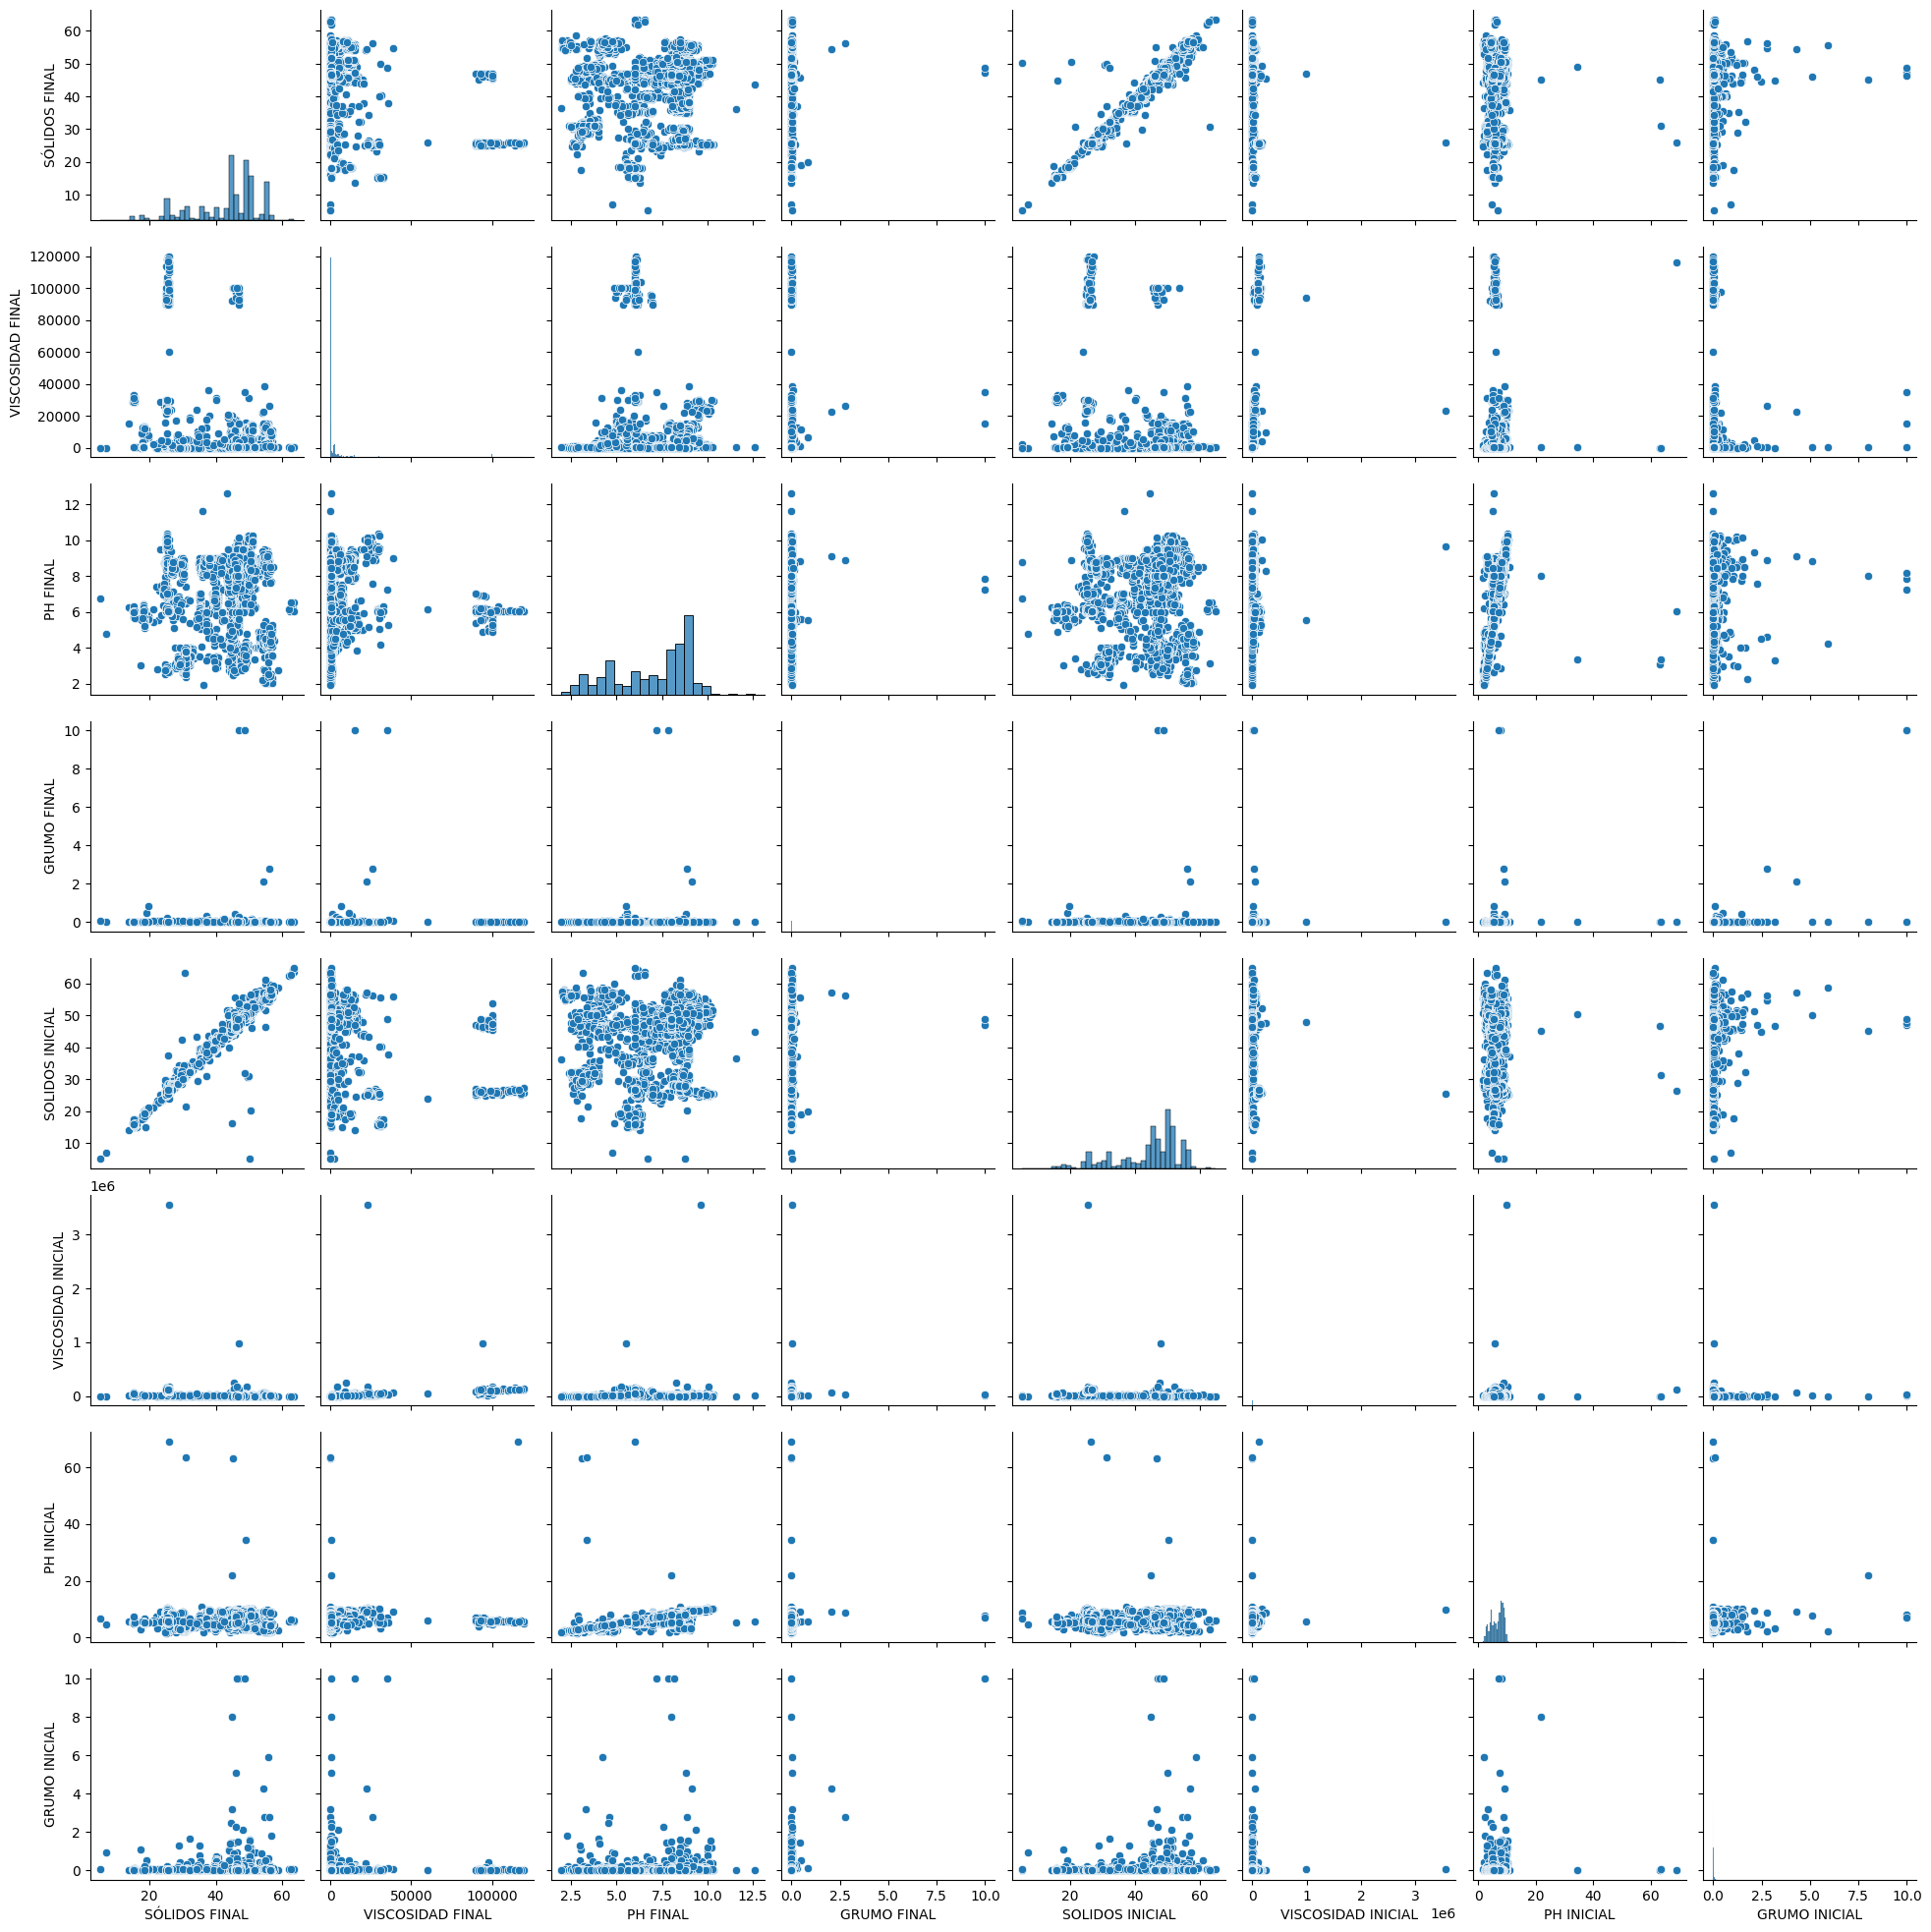

In [ ]:
sns.pairplot(df_clean)
plt.show()

Aquí vemos el df principal, donde contiene valores NAN, solo para analizar los graficos y ver si es que los valores cambian si usamos estos datos.

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/Proyecto_MachineLearning/BASE DATOS PROYECTO.xlsx')
df2

,LOTE,FAMILIA,PRODUCTO,CONDICIÓN,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,FABRICACIÓN,SÓLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
0,22A030020,A,A-001,A,P,BAR,TKS,03/01/2022,A,P,44.13,0.0,6.11,0.0000,45.45,0.0,8.93,0.0000,AG,JG
1,22A050073,A,A-001,A,P,BAR,TKS,06/01/2022,A,P,44.72,0.0,6.05,0.0000,44.90,0.0,9.02,0.0000,AG,JC
2,22A070106,A,A-001,A,P,BAR,TKS,10/01/2022,A,P,44.70,0.0,6.12,0.0000,44.70,0.0,7.38,0.0000,JC,MI
3,22A120145,A,A-001,A,P,BAR,TKS,13/01/2022,A,P,44.96,0.0,6.28,0.0000,45.11,0.0,9.76,0.0000,AG,JG
4,22A170189,A,A-001,A,P,BAR,TKS,18/01/2022,A,P,43.54,0.0,6.00,0.0000,45.78,0.0,6.05,0.0000,JC,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,23J050046,E,E-026,A,P,TBR,R08,05/10/2023,A,P,45.92,640.0,8.00,0.0090,49.61,420.0,5.00,0.0106,CR,JC
5290,23K010609,E,E-026,A,P,PIP,PIP,31/10/2023,A,M,46.19,600.0,7.36,0.0068,46.19,600.0,7.36,0.0068,JC,JC
5291,23K030051,E,E-026,A,P,CON,R08,06/11/2023,A,P,47.02,220.0,8.00,0.0032,49.15,340.0,5.10,0.0131,JG,MA
5292,23K100126,E,E-026,A,P,TBR,R08,13/11/2023,A,P,46.19,560.0,8.00,0.0071,49.06,660.0,4.98,0.0151,CR,JM


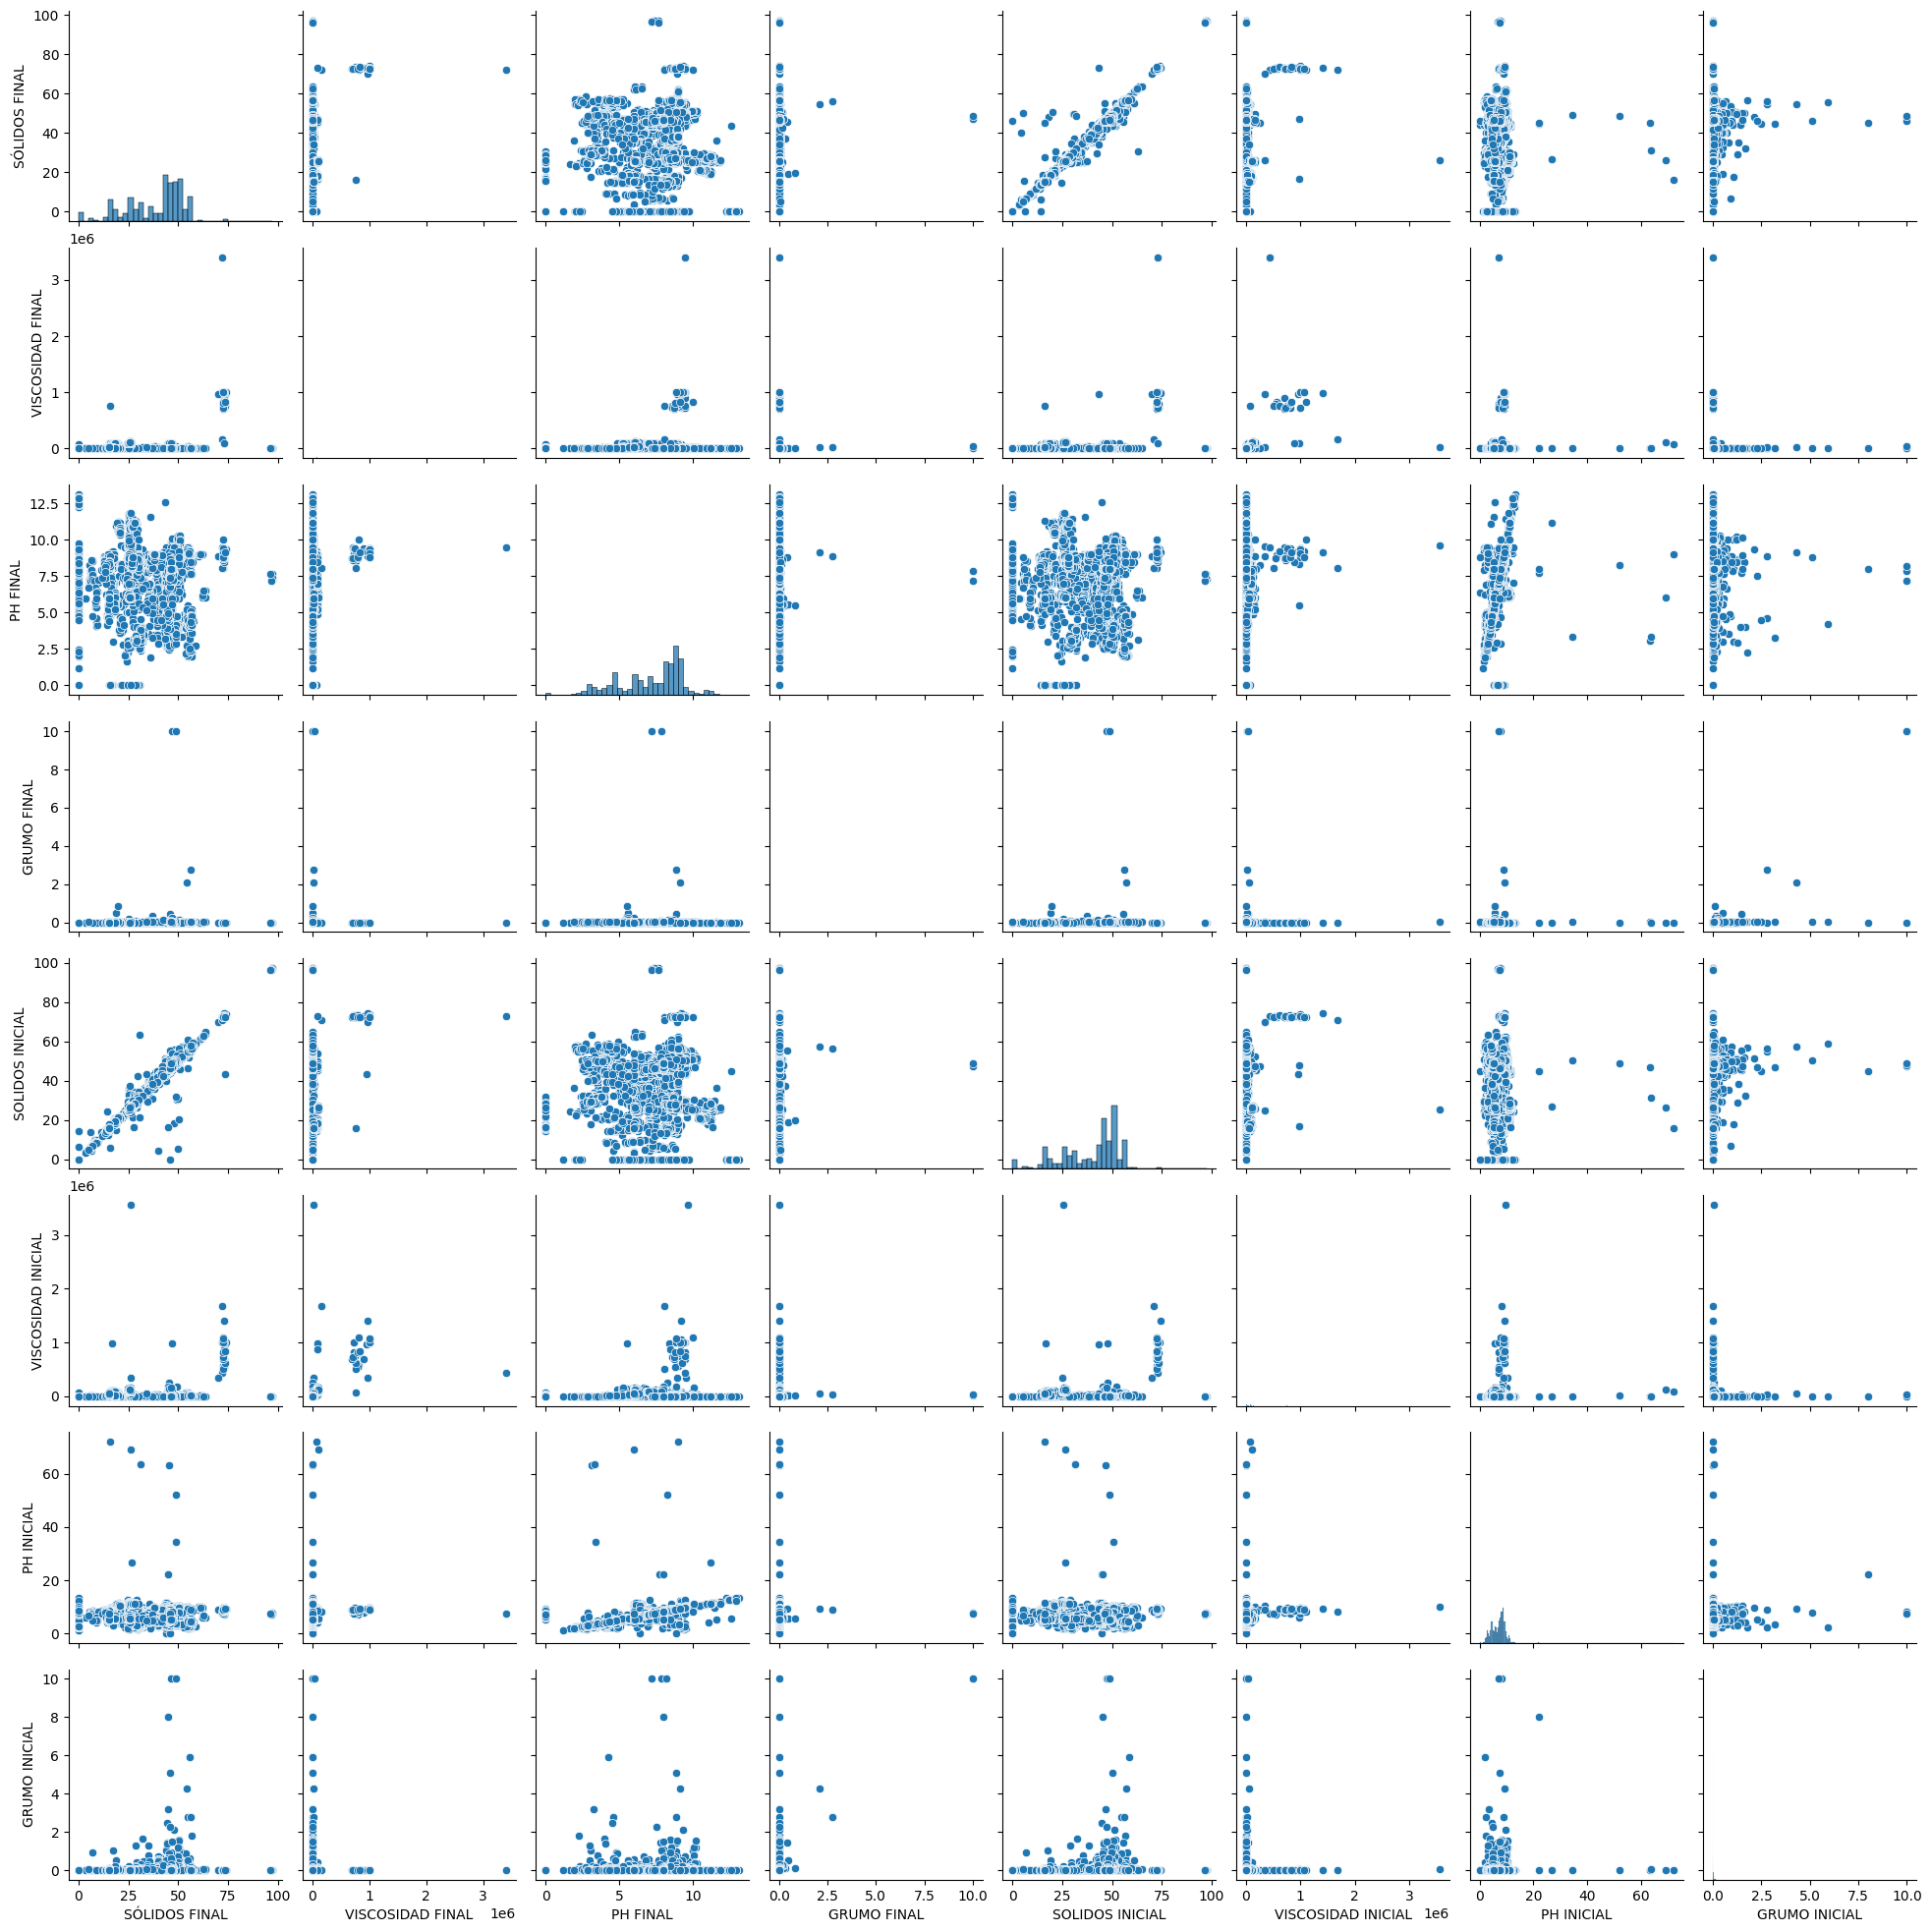

In [ ]:
sns.pairplot(df2);

###**Regresión Logística**

Como anteriormente se menciono a lo largo de este proyecto estaremos usando el dataframe "df_clean" la cual limpiamos de NANs (valores nulos).

In [ ]:
df_clean

,LOTE,FAMILIA,PRODUCTO,CONDICIÓN,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,FABRICACIÓN,SÓLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
603,22J200193,B,B-011,A,P,TBR,R15,20/10/2022,A,P,55.00,320.0,4.62,0.0068,55.78,370.0,4.54,0.0782,MI,AG
604,22J250680,B,B-011,A,P,PIP,PIP,25/10/2022,A,M,54.95,320.0,4.67,0.0051,46.39,480.0,7.95,0.0133,AG,AG
605,22K010052,B,B-011,A,P,TBR,R15,31/10/2022,A,P,54.69,270.0,4.75,0.0053,55.72,380.0,4.77,0.0115,MI,JG
606,22K010053,B,B-011,A,P,TBR,R15,01/11/2022,A,P,55.19,280.0,4.66,0.0062,55.76,320.0,4.66,0.0116,CR,MI
607,22K240254,B,B-011,A,P,TBR,R15,25/11/2022,A,P,55.06,430.0,4.63,0.0098,55.54,340.0,4.53,0.0380,JM,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,23J050046,E,E-026,A,P,TBR,R08,05/10/2023,A,P,45.92,640.0,8.00,0.0090,49.61,420.0,5.00,0.0106,CR,JC
5290,23K010609,E,E-026,A,P,PIP,PIP,31/10/2023,A,M,46.19,600.0,7.36,0.0068,46.19,600.0,7.36,0.0068,JC,JC
5291,23K030051,E,E-026,A,P,CON,R08,06/11/2023,A,P,47.02,220.0,8.00,0.0032,49.15,340.0,5.10,0.0131,JG,MA
5292,23K100126,E,E-026,A,P,TBR,R08,13/11/2023,A,P,46.19,560.0,8.00,0.0071,49.06,660.0,4.98,0.0151,CR,JM


In [ ]:
# Seleccionar características y objetivo
features = df_clean[['SOLIDOS INICIAL', 'SÓLIDOS FINAL', 'FAMILIA']]
target = df_clean['FAMILIA']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features[['SOLIDOS INICIAL', 'SÓLIDOS FINAL']], target, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
logreg = LogisticRegression(max_iter=400)
logreg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.57


Al imprimir el resultado de Accuracy fue de un 0.57, el cual nos indica que el modelo de regresión logística está clasificando correctamente el 57% de las instancias en el conjunto de prueba.

Para obtener una evaluación más completa del rendimiento del modelo, aplicaremos otras métricas de evaluación, las cuales son:

Matriz de confusión, precisión, recall y F1-Score.

Estas métricas nos pueden proporcionar información mas detallada sobre cómo el modelo ésta manejando las distintas clases y ser muy util en caso de desbalance de clases.

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un informe de clasificación
class_report = classification_report(y_test, y_pred, labels=df_clean['FAMILIA'].unique())

# Imprimir la matriz de confusión y el informe de clasificación
print("Matriz de Confusión:")
print(conf_matrix)

print("\nInforme de Clasificación:")
print(class_report)

Matriz de Confusión:
[[  2   7 102   0]
 [  6 262 164   2]
 [  2  49 405   0]
 [  0  91  80   1]]

Informe de Clasificación:
              precision    recall  f1-score   support

           B       0.20      0.02      0.03       111
           C       0.64      0.60      0.62       434
           D       0.54      0.89      0.67       456
           E       0.33      0.01      0.01       172

    accuracy                           0.57      1173
   macro avg       0.43      0.38      0.33      1173
weighted avg       0.51      0.57      0.50      1173



Vamos a calcular y mostrar métricas de evaluación para nuestro modelo de clasificación (matriz de confusión e informe de clasificación).


- La matriz de confusión es una tabla que muestra la cantidad de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN) del modelo.

- Es decir, para compara las predicciones del modelo con las etiquetas reales y cuenta cuántas predicciones fueron correctas y cuántas incorrectas.

Con este codigo, pudimos evaluar el rendimiento de nuestro modelo de clasificación, para comprender cómo se comporta el modelo en diferentes aspectos de la clasificación.

**Precision:** Indica la proporción de instancias positivas identificadas correctamente respecto a todas las instancias que el modelo clasificó como positivas.

**Recall:** Muestra la proporción de instancias positivas que fueron identificadas correctamente respecto a todas las instancias que realmente son positivas.

**F1-score:** Es una medida combinada de precisión y recall.

**Support:** Número de instancias en cada clase.

**Accuracy:** Muestra la proporción de predicciones correctas respecto al total de predicciones.


**Resultado**

*El modelo tiene:*

- Para la clase C, tiene un buen rendimiento con una precisión de 64% y un recall de 60%.

- Para la clase D, tiene una precisión 54% y un recall de 89%, indicando que el modelo tiende a identificar bien los casos positivos pero también clasifica algunos casos negativos como positivos.

- Para la clase B y E, tienen una precisión baja y un recall aun mas bajo, el modelo tiene dificultades para identificar esta clase.



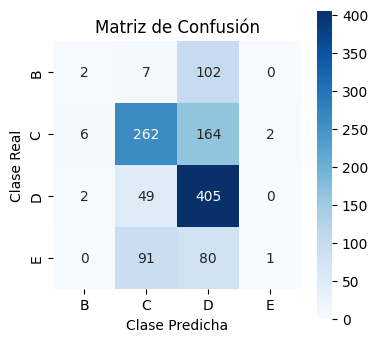

In [ ]:
# Supongamos que ya tienes la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Etiquetas de clases
classes = df_clean['FAMILIA'].unique()

# Crear un DataFrame de la matriz de confusión
conf_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Configurar el tamaño del gráfico
plt.figure(figsize=(4, 4))

# Crear el heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)

# Añadir etiquetas y título
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

Nuestro grafico de heatmap usa colores en tonos de azul para resaltar las áreas de la matriz de confusión y coloca etiquetas en los ejes para indicar las clases reales y predichas.

Además, los valores numéricos se muestran en las celdas del heatmap para indicar las cantidades correspondientes. Este tipo de gráfico es útil para visualizar rápidamente el rendimiento del modelo en diferentes clases.


La precisión (accuracy) como explicamos anteriormente, se calcula como el cociente entre el número de predicciones correctas (TP + TN) y el número total de instancias. En este caso, la precisión sería (2 + 1) / 3, que es aproximadamente 0.67 o 67%.



In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener métricas para cada clase (familia en tu caso)
precision_clases = precision_score(y_test, y_pred, average=None, labels=df_clean['FAMILIA'].unique())
recall_clases = recall_score(y_test, y_pred, average=None, labels=df_clean['FAMILIA'].unique())
accuracy_clases = accuracy_score(y_test, y_pred)

# Imprimir métricas para cada clase
for i, familia in enumerate(df_clean['FAMILIA'].unique()):
    print(f"\nResultados para la Familia {familia}:")
    print(f"Precisión: {precision_clases[i]:.2f}")
    print(f"Sensibilidad (Recall): {recall_clases[i]:.2f}")

# Calcular la precisión, sensibilidad y especificidad globales
precision_global = precision_score(y_test, y_pred, average='weighted')
recall_global = recall_score(y_test, y_pred, average='weighted')
accuracy_global = accuracy_score(y_test, y_pred)

# Acceder a los elementos de la matriz de confusión directamente
tn, fp, fn, tp = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

# Especificidad
especificidad = tn / (tn + fp)

# Imprimir métricas globales
print("\nMétricas Globales:")
print(f"Precisión Global: {precision_global:.2f}")
print(f"Sensibilidad (Recall) Global: {recall_global:.2f}")
print(f"Especificidad Global: {especificidad:.2f}")
print(f"Exactitud Global: {accuracy_global:.2f}")


Resultados para la Familia B:
Precisión: 0.20
Sensibilidad (Recall): 0.02

Resultados para la Familia C:
Precisión: 0.64
Sensibilidad (Recall): 0.60

Resultados para la Familia D:
Precisión: 0.54
Sensibilidad (Recall): 0.89

Resultados para la Familia E:
Precisión: 0.33
Sensibilidad (Recall): 0.01

Métricas Globales:
Precisión Global: 0.51
Sensibilidad (Recall) Global: 0.57
Especificidad Global: 0.22
Exactitud Global: 0.57


Los resultados representan los siguiente:

La precisión, mide la proporcion de predicciones positivas correctas entre todas las predicciones positivas, en nuestro caso, el resultado mas favorable fue de 0.64 en la familia C, lo que significa que el 64% de las predicciones positivas son correctas.


La sensibilidad que mide la proporción de verdaderos positivos, la sensibilidad mas favorable se encuentra en la familia D CON 0.89/89%, lo que indica que el modelo identifica correctamente todos los casos positivos reales.

Mientras que esecificidad global, es de 0.22, lo que nos indica  un valor bajo al identificar correctamente los casos negativos reales. Y por ultimo, la Exactitud Global salio en 0.57.


Por lo tanto, este modelo nos sirvio para algunos de nuestros valores, sin embargo para calcular la especificidad dentro de casos negativos reales, podría deberse a un desequilirio en los datos o una detección insatisfactoria de casos negativos o falta de datos no nulos, dentro de este dataframe.


###**Árboles de decisión**

In [ ]:
df_clean

,LOTE,FAMILIA,PRODUCTO,CONDICIÓN,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,FABRICACIÓN,SÓLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
603,22J200193,B,B-011,A,P,TBR,R15,20/10/2022,A,P,55.00,320.0,4.62,0.0068,55.78,370.0,4.54,0.0782,MI,AG
604,22J250680,B,B-011,A,P,PIP,PIP,25/10/2022,A,M,54.95,320.0,4.67,0.0051,46.39,480.0,7.95,0.0133,AG,AG
605,22K010052,B,B-011,A,P,TBR,R15,31/10/2022,A,P,54.69,270.0,4.75,0.0053,55.72,380.0,4.77,0.0115,MI,JG
606,22K010053,B,B-011,A,P,TBR,R15,01/11/2022,A,P,55.19,280.0,4.66,0.0062,55.76,320.0,4.66,0.0116,CR,MI
607,22K240254,B,B-011,A,P,TBR,R15,25/11/2022,A,P,55.06,430.0,4.63,0.0098,55.54,340.0,4.53,0.0380,JM,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,23J050046,E,E-026,A,P,TBR,R08,05/10/2023,A,P,45.92,640.0,8.00,0.0090,49.61,420.0,5.00,0.0106,CR,JC
5290,23K010609,E,E-026,A,P,PIP,PIP,31/10/2023,A,M,46.19,600.0,7.36,0.0068,46.19,600.0,7.36,0.0068,JC,JC
5291,23K030051,E,E-026,A,P,CON,R08,06/11/2023,A,P,47.02,220.0,8.00,0.0032,49.15,340.0,5.10,0.0131,JG,MA
5292,23K100126,E,E-026,A,P,TBR,R08,13/11/2023,A,P,46.19,560.0,8.00,0.0071,49.06,660.0,4.98,0.0151,CR,JM


Primero, vamos a dividir los datos en conjunto de entrenamiento y prueba usando las columnas relevantes que hemos usado hasta ahora.

In [ ]:
# Seleccionar las columnas que serán utilizadas como características y como el objetivo
X = df_clean[['FAMILIA', 'SOLIDOS INICIAL', 'SÓLIDOS FINAL']]
y = df_clean['FAMILIA']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


:Aquí, X es el conjunto de caracteristicas, mientras que Y es nuestra variable objetivo.

In [ ]:
# Definir las columnas categóricas
columnas_categoricas = ['FAMILIA']

# Crear el transformador para las variables categóricas
transformador = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), columnas_categoricas)
], remainder='passthrough')

# Aplicar la transformación a las características
X_train_transformado = transformador.fit_transform(X_train)
X_test_transformado = transformador.transform(X_test)


In [ ]:
# Inicializar y entrenar el modelo de bosque aleatorio
bosque = RandomForestClassifier(n_estimators=800)
bosque.fit(X_train_transformado, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred = bosque.predict(X_test_transformado)
y_pred

# Calcular la precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión: {precision:.2f}')

Precisión: 1.00


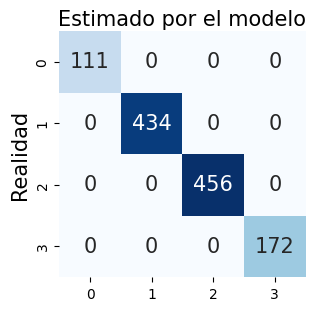

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_pred)

class_names = ['B', 'E']  # Nombre de las clases según tu caso

# Crear un mapa de calor para la matriz de confusión
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Crear el mapa de calor
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size": 15})
ax.xaxis.set_label_position("top")

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Etiquetas de los ejes
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15)

# Mostrar el mapa de calor
plt.show()

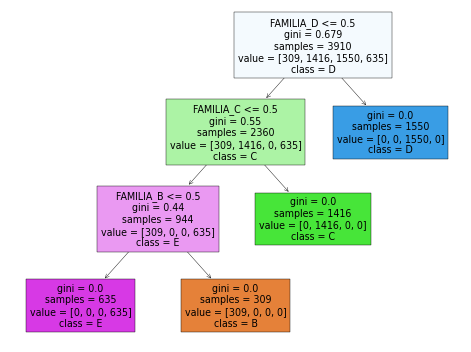

In [ ]:
# Considerando 'FAMILIA', 'SOLIDOS INICIAL' y 'SÓLIDOS FINAL' como características
features = df_clean[['FAMILIA', 'SOLIDOS INICIAL', 'SÓLIDOS FINAL']]
target = df_clean['FAMILIA']

# Convertir características categóricas a numéricas
features_encoded = pd.get_dummies(features, columns=['FAMILIA'])

# Inicializar y entrenar el modelo de árbol de decisión
arbol = DecisionTreeClassifier()
arbol.fit(features_encoded, target)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 15), dpi=30)
plot_tree(arbol, filled=True, feature_names=features_encoded.columns, class_names=arbol.classes_)
plt.show()


# Clasificación y redes neuronales artificiales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Proyecto_MachineLearning/BASE DATOS PROYECTO.xlsx')

In [ ]:
df.isna()

,LOTE,FAMILIA,PRODUCTO,CONDICIÓN,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,FABRICACIÓN,SÓLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5290,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5291,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5292,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

LOTE                   0
FAMILIA                0
PRODUCTO               0
CONDICIÓN              0
ORIGEN                 0
ENVASE                 0
REACTOR                0
FECHA_FAB              0
STATUS                 0
FABRICACIÓN            0
SÓLIDOS FINAL          0
VISCOSIDAD FINAL       0
PH FINAL               0
GRUMO FINAL            0
SOLIDOS INICIAL        1
VISCOSIDAD INICIAL    31
PH INICIAL             0
GRUMO INICIAL          0
ANALISTA INICIAL       1
ANALISTA FINAL         5
dtype: int64

Contamos con algunos NaNs, por tanto se hara el procedimiento correspondiente para poder limpiar el dataSet.


In [ ]:
df_dropped = df.dropna()

In [ ]:
df_dropped.head(10)

,LOTE,FAMILIA,PRODUCTO,CONDICIÓN,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,FABRICACIÓN,SÓLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
0,22A030020,A,A-001,A,P,BAR,TKS,03/01/2022,A,P,44.13,0.0,6.11,0.0,45.45,0.0,8.93,0.0,AG,JG
1,22A050073,A,A-001,A,P,BAR,TKS,06/01/2022,A,P,44.72,0.0,6.05,0.0,44.90,0.0,9.02,0.0,AG,JC
2,22A070106,A,A-001,A,P,BAR,TKS,10/01/2022,A,P,44.70,0.0,6.12,0.0,44.70,0.0,7.38,0.0,JC,MI
3,22A120145,A,A-001,A,P,BAR,TKS,13/01/2022,A,P,44.96,0.0,6.28,0.0,45.11,0.0,9.76,0.0,AG,JG
4,22A170189,A,A-001,A,P,BAR,TKS,18/01/2022,A,P,43.54,0.0,6.00,0.0,45.78,0.0,6.05,0.0,JC,MA
5,22A190212,A,A-001,A,P,TBR,TKS,20/01/2022,A,P,44.20,0.0,6.10,0.0,44.67,0.0,8.80,0.0,MA,MI
6,22A240263,A,A-001,A,P,BAR,TKS,25/01/2022,A,P,43.65,0.0,6.17,0.0,45.50,0.0,9.60,0.0,CR,MA
7,22B010026,A,A-001,A,P,BAR,TKS,01/02/2022,A,P,44.02,0.0,6.23,0.0,44.19,0.0,9.54,0.0,JM,MA
8,22B020054,A,A-001,A,P,BAR,TKS,03/02/2022,A,P,44.53,0.0,6.46,0.0,44.84,0.0,10.70,0.0,JM,AG
9,22B140152,A,A-001,A,P,BAR,TKS,15/02/2022,A,P,43.96,0.0,6.08,0.0,45.43,0.0,10.57,0.0,CR,JC


In [ ]:
df_dropped.isna().sum()

LOTE                  0
FAMILIA               0
PRODUCTO              0
CONDICIÓN             0
ORIGEN                0
ENVASE                0
REACTOR               0
FECHA_FAB             0
STATUS                0
FABRICACIÓN           0
SÓLIDOS FINAL         0
VISCOSIDAD FINAL      0
PH FINAL              0
GRUMO FINAL           0
SOLIDOS INICIAL       0
VISCOSIDAD INICIAL    0
PH INICIAL            0
GRUMO INICIAL         0
ANALISTA INICIAL      0
ANALISTA FINAL        0
dtype: int64

###Red de Prediccion

In [ ]:
# Seleccionar características y objetivo
features = df_dropped[['SOLIDOS INICIAL', 'SÓLIDOS FINAL', 'FAMILIA']]
target = df_dropped['FAMILIA']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features[['SOLIDOS INICIAL', 'SÓLIDOS FINAL']], target, test_size=0.3, random_state=42)

Se dividio el conjunto de datos en 30% datos de prueba y 70% datos de entrenamiento

In [ ]:
def calcularZ(w,x,b):
    z = np.dot(w,x)+b
    return z

def activacion(z): #Funcion de activacion identidad
    y = (z)
    return y

# Definición de la función para la propagación hacia adelante de una capa neuronal
def capaNeuronal(w,x,b):
    z = calcularZ(w,x,b)
    y_pred = activacion(z)
    return y_pred

#Inicializar capa
def inicializarCapa(numCaracteristicas, numNeuronas):
    w = np.random.rand(numCaracteristicas,numNeuronas)
    w_transpose = w.T
    b = np.random.rand(numNeuronas)
    return w_transpose,b

Comenzamos con 3679 caracteristicas de entrada y 4 neuronas en la primera capa, En la segunda Capa de la red, se inicializan los pesos y se configuran para tener una conexion de 4 neuronas  de la primer capa a 4 neuronas de la segunda capa, ademas se asignan los datos de entrada y realiza una propagacion hacia adelante.

In [ ]:
# Definición de los pesos y sesgos obtenidos previamente
w1, b1 = inicializarCapa(3679, 4)  # Pesos y sesgos de la capa 1
w2, b2 = inicializarCapa(4, 4)   # Pesos y sesgos de la capa 2

# Datos de entrada para hacer la predicción
x_pred = X_train['SOLIDOS INICIAL']

# Realizar la propagación hacia adelante para obtener la predicción
y1_pred = capaNeuronal(w1, x_pred, b1)  # Salida de la capa 1
y_pred = capaNeuronal(w2, y1_pred, b2)  # Predicción final

# Imprimir la predicción
print("Predicción:", y_pred)


Predicción: [103598.4322318  189198.94091572 188457.09613334 166199.38086846]


In [ ]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [ ]:
from sklearn.neural_network import MLPClassifier
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features['SOLIDOS INICIAL'], target, test_size=0.3, random_state=42)


X= X_train.values.reshape(-1, 1)
Y= y_train.values.reshape(-1)
redNeuronal = MLPClassifier(hidden_layer_sizes=(4,2),
                            max_iter=10000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(X, Y)
Y_pred = redNeuronal.predict(X)
print(Y_pred)

['B' 'B' 'D' ... 'D' 'D' 'B']


Se entrena la red, con con MLPClassifier, activacion 'Logistic', con 10000 iteraciones este valor se eligio al azar, ademas mas adelante se realiza el mismo procedimiento pero con una cantidad mas grande (20000 iteraciones) para ver la prediccion

In [ ]:
len(Y_pred)

3679

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)

print("Sensibilidad:", sen)
print("Especificidad:", spec)

Sensibilidad: 100.0
Especificidad: 0.0


In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features[['SOLIDOS INICIAL', 'SÓLIDOS FINAL']], target, test_size=0.4, random_state=42)

redNeuronal = MLPClassifier(hidden_layer_sizes=(4,2),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(X_train, y_train)
y_pred = redNeuronal.predict(X_test)

print("Entrenamiento completado!")
print(y_pred)

Entrenamiento completado!
['D' 'D' 'D' ... 'D' 'C' 'B']


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)

print("Sensibilidad:", sen)
print("Especificidad:", spec)

Sensibilidad: 100.0
Especificidad: 0.0


La sensibilidad es la tasa de verdaderos positivos, el tener el 100% indica que no hay falsos negativos osease que todos los negativos reales son identificados por el modelo, pero probablemente hay un problema con la red o el entrenamiento

Creo que para lo que nos enfocamos en el proyecto no era necesario aplicar este algorito ya que solo nos enfocamos en la caracteristica de solidos y es suficiente con un Modelo de regresion o logistic, los cuales se aplicaron en el apartado anterior.

#Selección de modelo (Arena de clasificadores)

Utilizamos nuestro dataframe libre de NaNs

In [ ]:
df= pd.read_excel ('/content/drive/MyDrive/BASE DATOS PROYECTO.xlsx')
df
df_clean= df.fillna (0)
df_clean

,LOTE,FAMILIA,PRODUCTO,CONDICIÓN,ORIGEN,ENVASE,REACTOR,FECHA_FAB,STATUS,FABRICACIÓN,SÓLIDOS FINAL,VISCOSIDAD FINAL,PH FINAL,GRUMO FINAL,SOLIDOS INICIAL,VISCOSIDAD INICIAL,PH INICIAL,GRUMO INICIAL,ANALISTA INICIAL,ANALISTA FINAL
0,22A030020,A,A-001,A,P,BAR,TKS,03/01/2022,A,P,44.13,0.0,6.11,0.0000,45.45,0.0,8.93,0.0000,AG,JG
1,22A050073,A,A-001,A,P,BAR,TKS,06/01/2022,A,P,44.72,0.0,6.05,0.0000,44.90,0.0,9.02,0.0000,AG,JC
2,22A070106,A,A-001,A,P,BAR,TKS,10/01/2022,A,P,44.70,0.0,6.12,0.0000,44.70,0.0,7.38,0.0000,JC,MI
3,22A120145,A,A-001,A,P,BAR,TKS,13/01/2022,A,P,44.96,0.0,6.28,0.0000,45.11,0.0,9.76,0.0000,AG,JG
4,22A170189,A,A-001,A,P,BAR,TKS,18/01/2022,A,P,43.54,0.0,6.00,0.0000,45.78,0.0,6.05,0.0000,JC,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,23J050046,E,E-026,A,P,TBR,R08,05/10/2023,A,P,45.92,640.0,8.00,0.0090,49.61,420.0,5.00,0.0106,CR,JC
5290,23K010609,E,E-026,A,P,PIP,PIP,31/10/2023,A,M,46.19,600.0,7.36,0.0068,46.19,600.0,7.36,0.0068,JC,JC
5291,23K030051,E,E-026,A,P,CON,R08,06/11/2023,A,P,47.02,220.0,8.00,0.0032,49.15,340.0,5.10,0.0131,JG,MA
5292,23K100126,E,E-026,A,P,TBR,R08,13/11/2023,A,P,46.19,560.0,8.00,0.0071,49.06,660.0,4.98,0.0151,CR,JM


Probamos el clasificador Maquina de Soporte Vectorial

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

Primero le pedimos que entrene y luego que genere la predicción con los datos que nos interesan

In [ ]:
features = df_clean[['SOLIDOS INICIAL', 'SÓLIDOS FINAL', 'FAMILIA']]
target = df_clean['FAMILIA']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features[['SOLIDOS INICIAL', 'SÓLIDOS FINAL']], target, test_size=0.3, random_state=42)

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.4638137193203272



La precisión del modelo obtenida es de aproximadamente 0.46 o 46.38%. La precisión es una métrica que indica la proporción de predicciones correctas realizadas por el modelo en relación con el total de predicciones. En este caso, significa que alrededor del 46.38% de las predicciones del modelo fueron correctas en el conjunto de prueba.



Ahora estaremos empleando el clasificador de Bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


 Inicializa y entrena el clasificador de Bayes:

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)



GaussianNB()

Realizamos la predicción para evaluar el rendimiento del modelo

In [ ]:
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.4933920704845815



La precisión del modelo obtenida es aproximadamente 0.49 o 49.34%. La precisión del 49.34% sugiere que el modelo de Naive Bayes a comparación con el anterior,está teniendo un rendimiento modesto en este conjunto de datos específico, por lo tanto es el que se emplea.

#Fundamentos de procesamiento de Imágenes (Sistema de procesamiento de imágenes con Machine Learning)

Debido a la falta de imágenes en nuestra base de datos, no es posible llevar a cabo está sección del proyecto :)
